# BS6201 - Group Project
## Group Member: Ni Yuxin, Huang Jiadeng

## Brief Introduction:
This project consists of 2 functional module, including the traditional recomendation system realizatoin and the sentiment analysis. The dataset used in this project is the medecin review dataset. The public resource of the dataset can be found via link https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29  

## 1.Preprocessing
In this part, we will remove the faulty rows and rows with null value in training & testing dataset, do a word cleaning for review, and assign the class label to each samples based on the rating value. All the cleaned data will be saved to a new dataset file for future usage.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_ori=pd.read_csv('train.csv',encoding="ISO-8859-1")
test_ori=pd.read_csv('test.csv',encoding="ISO-8859-1")

In [3]:
train_ori

uniqueID                   drugName                  condition  \
0              2        Medroxyprogesterone                 Amenorrhea   
1              3        Medroxyprogesterone  Abnormal Uterine Bleeding   
2              4        Medroxyprogesterone              Birth Control   
3              5        Medroxyprogesterone  Abnormal Uterine Bleeding   
4              7        Medroxyprogesterone  Abnormal Uterine Bleeding   
...          ...                        ...                        ...   
161266    232286  Amoxicillin / clavulanate                  Sinusitis   
161267    232288  Amoxicillin / clavulanate                  Sinusitis   
161268    232289  Amoxicillin / clavulanate    Urinary Tract Infection   
161269    232290  Amoxicillin / clavulanate               Otitis Media   
161270    232291  Amoxicillin / clavulanate                  Sinusitis   

                                                   review rating       date  \
0       "I&#039;m 21 years old and recently found out ...     10  27-Oct-15   
1       "I have been on the shot 11 years and until a ...      8  27-Oct-15   
2       "Ive had four shots at this point. I was on bi...      9  26-Oct-15   
3       "I had a total of 3 shots. I got my first one ...      1  25-Oct-15   
4       "I&#039;m 18 and got this for heavy bleeding. ...      5  22-Oct-15   
...                                                   ...    ...        ...   
161266  "Don&#039;t ever use this, \r\nWhen I was 4 ye...      1  29-Jun-17   
161267  "For acute maxillary sinusitis. Day two, just ...      9  21-Jun-17   
161268  "I took Amox Clav 2x day for 7 days for my uri...      4  17-Jun-17   
161269  "Day 1 - serious pain and diminished hearing i...      1  16-Jun-17   
161270  "Every time I have had a sinus infection and b...     10  16-Jun-17   

       usefulCount Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0               11        NaN        NaN        NaN         NaN         NaN   
1                7        NaN        NaN        NaN         NaN         NaN   
2               12        NaN        NaN        NaN         NaN         NaN   
3                4        NaN        NaN        NaN         NaN         NaN   
4                6        NaN        NaN        NaN         NaN         NaN   
...            ...        ...        ...        ...         ...         ...   
161266           8        NaN        NaN        NaN         NaN         NaN   
161267          14        NaN        NaN        NaN         NaN         NaN   
161268           2        NaN        NaN        NaN         NaN         NaN   
161269           0        NaN        NaN        NaN         NaN         NaN   
161270          28        NaN        NaN        NaN         NaN         NaN   

        Unnamed: 12  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
161266          NaN  
161267          NaN  
161268          NaN  
161269          NaN  
161270          NaN  

[161271 rows x 13 columns]

In [4]:
test_ori

uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                          "Quick reduction of symptoms"       9  29-Sep-17   
3      "Contrave combines drugs that were used for al...       9   5-Mar-17   
4      "I have been on this birth control for one cyc...       9  22-Oct-15   
...                                                  ...     ...        ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...      10  13-Sep-14   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...       9   8-Oct-16   
53763  "I&#039;m married, 34 years old and I have no ...       8  15-Nov-10   
53764  "I was prescribed Nucynta for severe neck/shou...       1  28-Nov-11   
53765                                      "It works!!!"       9  13-Sep-09   

       usefulCount  
0               22  
1               17  
2                3  
3               35  
4                4  
...            ...  
53761           43  
53762           11  
53763            7  
53764           20  
53765           46  

[53766 rows x 7 columns]

## 1.1 Remove faulty rows

In [5]:
def GetFaultyRowID(df):
    faultyRowID=[]
    for index,row in df.iterrows():
        try:
            rating=int(row['rating'])
        except ValueError:
            faultyRowID.append(row['uniqueID'])
    print("Faulty Rows Count:"+str(len(faultyRowID)))
    print("Faulty Rows Ratio:"+str(len(faultyRowID)/len(df)))
    print("Rows with null rating count:"+str(len(df[df['rating'].isna()])))
    print("Rows with null rating ratio:"+str(len(df[df['rating'].isna()])/len(df)))
    return faultyRowID

## We have identified that the ratio of the faulty rows among the whole dataset is too low, so that it can be just ignored and removed. So, we will just drop those rows.

In [6]:
print("Checking & deleting faulty rows for training set.")
faultyRow=GetFaultyRowID(train_ori)
train_ori=train_ori[~train_ori['uniqueID'].isin(faultyRow)]
print("Checking & deleting faulty rows for test set.")
faultyRow=GetFaultyRowID(test_ori)
test_ori=test_ori[~test_ori['uniqueID'].isin(faultyRow)]

Checking & deleting faulty rows for training set.
Faulty Rows Count:20
Faulty Rows Ratio:0.00012401485697986618
Rows with null rating count:4
Rows with null rating ratio:2.480297139597324e-05
Checking & deleting faulty rows for test set.
Faulty Rows Count:0
Faulty Rows Ratio:0.0
Rows with null rating count:0
Rows with null rating ratio:0.0


## The original dataset have many null columns, so we only select those meaningful columns for our usage

In [7]:
train=train_ori[['uniqueID','drugName','condition','review','date']]
test=test_ori[['uniqueID','drugName','condition','review','date']]

In [8]:
train['rating']=pd.to_numeric(train_ori['rating'])
test['rating']=pd.to_numeric(test_ori['rating'])

In [9]:
train['usefulCount']=pd.to_numeric(train_ori['usefulCount'])
test['usefulCount']=pd.to_numeric(test_ori['usefulCount'])

## 1.2 Clean the review for further sentiment analysis

In [10]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
from wordcloud import WordCloud, STOPWORDS

## Firstly, we have used the word cloud plot to roughly see the frequence of all the words in the review column.

In [11]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,7), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

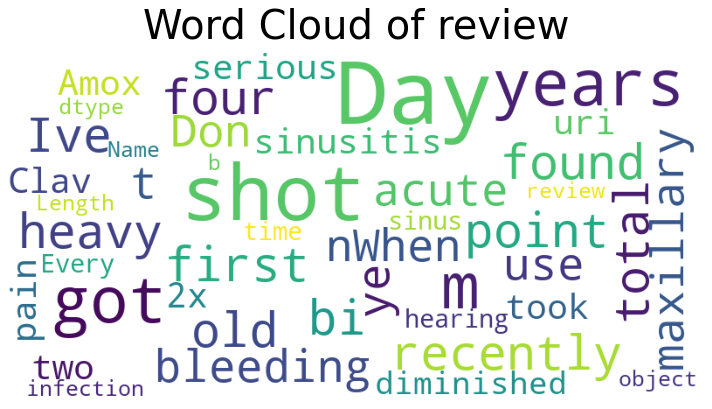

In [12]:
plot_wordcloud(train["review"], title="Word Cloud of review")

## From the plot above, we can find that the word like Day, years, shot are likely the most frequent words in the training set.

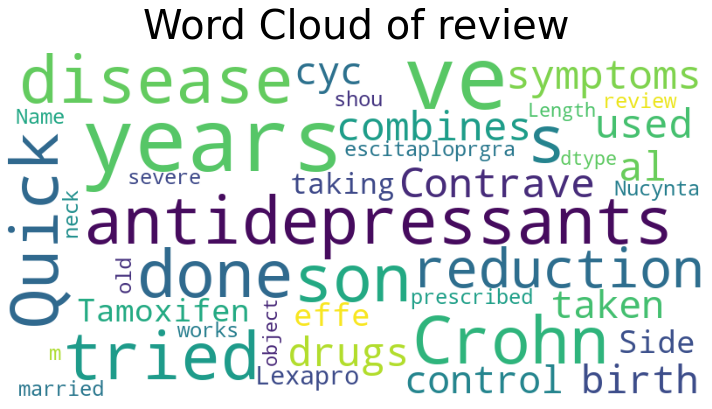

In [13]:
plot_wordcloud(test["review"], title="Word Cloud of review")

## From the plot above, we can find that the word like antidepressants, years, disease are likely the most frequent words in the testing set.

## To further clean the reviews, we apply the stopword here. The below plot shows the word included in the stopwords package.

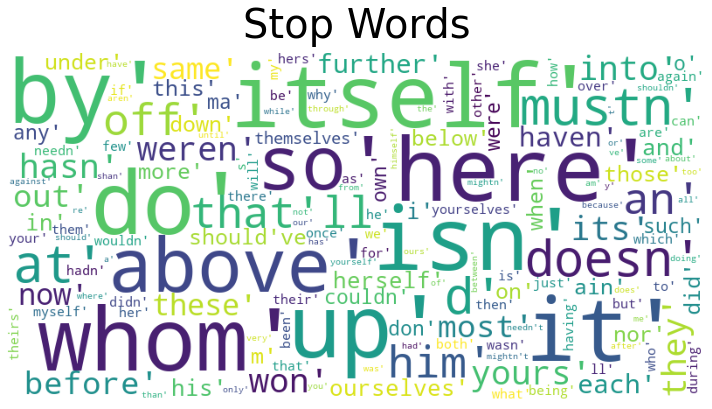

In [14]:
stops = set(stopwords.words('english'))
plot_wordcloud(stops, title="Stop Words")

## We then remove some stopword that may be also emotional from the original stopword list.

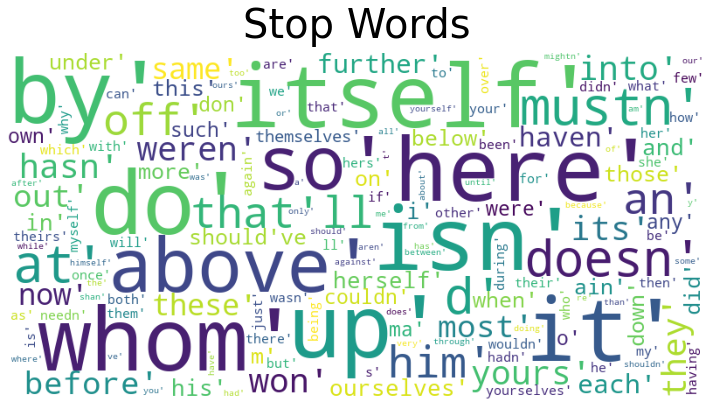

In [15]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

plot_wordcloud(stops, title="Stop Words")

## After that, the review clean is applied to both training & testing dataset. The words included in stopwords list is removed, and all the words are splited. The cleaned reviews is then saved to a new columns called 'review_clean'

In [16]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [17]:
train['review_clean']=train['review'].apply(review_to_words)
test['review_clean']=test['review'].apply(review_to_words)

## To visualize the word frequency in our processed training & testing dataset

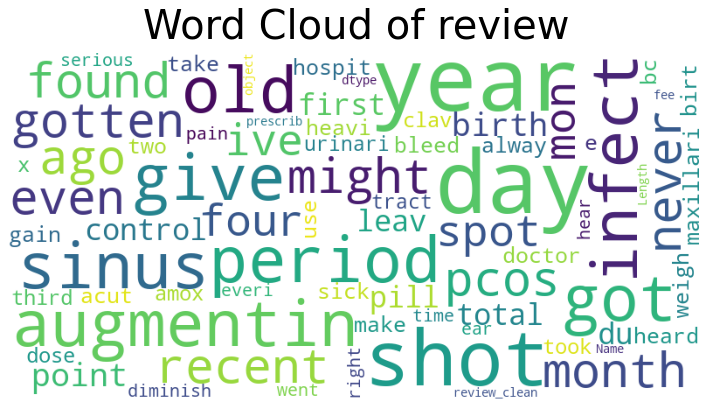

In [18]:
plot_wordcloud(train["review_clean"], title="Word Cloud of review")

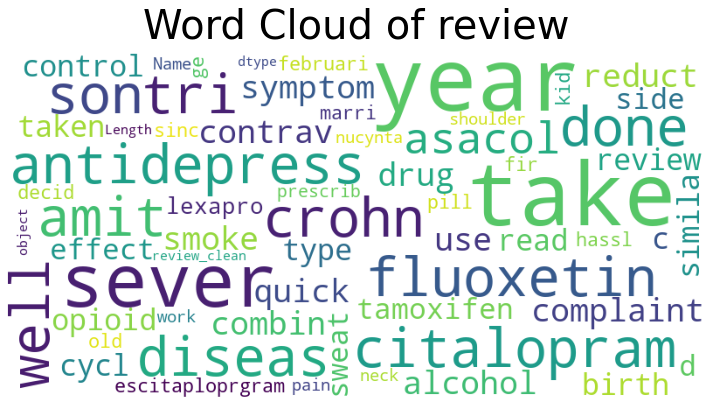

In [19]:
plot_wordcloud(test["review_clean"], title="Word Cloud of review")

##  Based on the cleaned review, we then assign the directly predicted sentiment by NLTPK. This is the sentiment coefficient generated by the algorithm inside the package NLTPK. This may be a feature in our future classification task.

In [20]:
from textblob import TextBlob
from tqdm import tqdm

In [21]:
reviews = train['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
train["Predict_Sentiment"] = Predict_Sentiment

100%|| 161251/161251 [01:07<00:00, 2396.42it/s]


In [22]:
train["Predict_Sentiment"]

0         0.179365
1        -0.016667
2         0.069444
3         0.103333
4         0.098052
            ...   
161266   -0.206071
161267    0.200000
161268    0.107143
161269    0.036054
161270    0.500000
Name: Predict_Sentiment, Length: 161251, dtype: float64

In [23]:
reviews = test['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
test["Predict_Sentiment"] = Predict_Sentiment
test["Predict_Sentiment"]

100%|| 53766/53766 [00:20<00:00, 2614.32it/s]


0       -0.122222
1        0.150000
2        0.333333
3        0.700000
4        0.210833
           ...   
53761   -0.078571
53762    0.106238
53763    0.069949
53764    0.000000
53765    0.000000
Name: Predict_Sentiment, Length: 53766, dtype: float64

### Recheck the null values in the generated rows

## 1.3 Assign sentiment class based on rating value
### In this part, we will generate our self-defined sentiment class for each sample.

In [24]:
print("Max rating:"+str(max(train['rating']))+"; Min rating:"+str(min(train['rating'])))

Max rating:10; Min rating:1


## Class Label Assignment Rule:
### Good -- Rating higher than 5, assigned as 1
### Bad -- Rating lower than or equal to 5, assigned as 0

In [25]:
def RatingClass(rating):
    if rating>5:
        return 1
    else:
        return 0

In [26]:
train['sentiment']=train['rating'].apply(RatingClass)
test['sentiment']=test['rating'].apply(RatingClass)

In [28]:
train.to_csv('train_processed.csv')
test.to_csv('test_processed.csv')

In [29]:
train

uniqueID                   drugName                  condition  \
0              2        Medroxyprogesterone                 Amenorrhea   
1              3        Medroxyprogesterone  Abnormal Uterine Bleeding   
2              4        Medroxyprogesterone              Birth Control   
3              5        Medroxyprogesterone  Abnormal Uterine Bleeding   
4              7        Medroxyprogesterone  Abnormal Uterine Bleeding   
...          ...                        ...                        ...   
161266    232286  Amoxicillin / clavulanate                  Sinusitis   
161267    232288  Amoxicillin / clavulanate                  Sinusitis   
161268    232289  Amoxicillin / clavulanate    Urinary Tract Infection   
161269    232290  Amoxicillin / clavulanate               Otitis Media   
161270    232291  Amoxicillin / clavulanate                  Sinusitis   

                                                   review       date  rating  \
0       "I&#039;m 21 years old and recently found out ...  27-Oct-15      10   
1       "I have been on the shot 11 years and until a ...  27-Oct-15       8   
2       "Ive had four shots at this point. I was on bi...  26-Oct-15       9   
3       "I had a total of 3 shots. I got my first one ...  25-Oct-15       1   
4       "I&#039;m 18 and got this for heavy bleeding. ...  22-Oct-15       5   
...                                                   ...        ...     ...   
161266  "Don&#039;t ever use this, \r\nWhen I was 4 ye...  29-Jun-17       1   
161267  "For acute maxillary sinusitis. Day two, just ...  21-Jun-17       9   
161268  "I took Amox Clav 2x day for 7 days for my uri...  17-Jun-17       4   
161269  "Day 1 - serious pain and diminished hearing i...  16-Jun-17       1   
161270  "Every time I have had a sinus infection and b...  16-Jun-17      10   

        usefulCount                                       review_clean  \
0                11  year old recent found might pcos gotten period...   
1                 7  shot year month ago never period even spot mon...   
2                12  ive four shot point birth control pill year du...   
3                 4  total shot got first one leav hospit give birt...   
4                 6  got heavi bleed alway heard bc make gain weigh...   
...             ...                                                ...   
161266            8  ever use year old sick doctor give augmentin e...   
161267           14  acut maxillari sinus day two take third dose a...   
161268            2  took amox clav x day day urinari tract infect ...   
161269            0  day serious pain diminish hear right ear went ...   
161270           28  everi time sinus infect prescrib augmentin fee...   

        Predict_Sentiment  sentiment  
0                0.179365          1  
1               -0.016667          1  
2                0.069444          1  
3                0.103333          0  
4                0.098052          0  
...                   ...        ...  
161266          -0.206071          0  
161267           0.200000          1  
161268           0.107143          0  
161269           0.036054          0  
161270           0.500000          1  

[161251 rows x 10 columns]

In [30]:
test

uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review       date  rating  \
0      "I&#039;ve tried a few antidepressants over th...  28-Feb-12      10   
1      "My son has Crohn&#039;s disease and has done ...  17-May-09       8   
2                          "Quick reduction of symptoms"  29-Sep-17       9   
3      "Contrave combines drugs that were used for al...   5-Mar-17       9   
4      "I have been on this birth control for one cyc...  22-Oct-15       9   
...                                                  ...        ...     ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...  13-Sep-14      10   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...   8-Oct-16       9   
53763  "I&#039;m married, 34 years old and I have no ...  15-Nov-10       8   
53764  "I was prescribed Nucynta for severe neck/shou...  28-Nov-11       1   
53765                                      "It works!!!"  13-Sep-09       9   

       usefulCount                                       review_clean  \
0               22  tri antidepress year citalopram fluoxetin amit...   
1               17  son crohn diseas done well asacol no complaint...   
2                3                               quick reduct symptom   
3               35  contrav combin drug use alcohol smoke opioid c...   
4                4  birth control one cycl read review type simila...   
...            ...                                                ...   
53761           43  taken tamoxifen year side effect sever sweat d...   
53762           11  take lexapro escitaploprgram sinc februari fir...   
53763            7  marri year old no kid take pill hassl decid ge...   
53764           20  prescrib nucynta sever neck shoulder pain take...   
53765           46                                               work   

       Predict_Sentiment  sentiment  
0              -0.122222          1  
1               0.150000          1  
2               0.333333          1  
3               0.700000          1  
4               0.210833          1  
...                  ...        ...  
53761          -0.078571          1  
53762           0.106238          1  
53763           0.069949          1  
53764           0.000000          0  
53765           0.000000          1  

[53766 rows x 10 columns]

## Check the correlation coefficient between the predicted sentiment and our sefl-defined sentiment

In [31]:
np.corrcoef(train['Predict_Sentiment'],train['sentiment'])

array([[1.        , 0.23499099],
       [0.23499099, 1.        ]])

In [32]:
np.corrcoef(test['Predict_Sentiment'],test['sentiment'])

array([[1.        , 0.23594268],
       [0.23594268, 1.        ]])

## 1.4 Further process the data
### Some issues(missing values in rating. etc) are still there after the data is saved. So we do another round of null value removing

In [33]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

In [34]:
print("Ratio of null value in training set is:{}; Ratio of null value in testing set is:{}".format(len(test[test['review_clean'].isna()])/len(test),len(train[train['review_clean'].isna()])/len(train)))

Ratio of null value in training set is:3.719822936428226e-05; Ratio of null value in testing set is:3.720907157164917e-05


### The ratio is too low, so we will delete the rows.

In [35]:
test=test[~test['review_clean'].isna()]

In [36]:
train=train[~train['review_clean'].isna()]

In [37]:
train.to_csv('train_processed.csv')
test.to_csv('test_processed.csv')

## 1.4 Build our own emotion dictionary
## Besides of the NLTPK predicted sentiment, we also tried to build our own emotion dictionary. The dictionary is built based on the rules below:
### 1. For the word found in the cleaned review in each sample, we will record its count and corresponding rating value.
### 2. Go through the whole table to get a general list for the word's count & corresponding sum of the rating value.
### 3. Calculate the average rating for each word.
### 4. For each word, if the averate rating is more than 5, then it will be considered as a positive word, otherwise, it will be considered as a negative word.

In [64]:
EmotionDict=pd.DataFrame(columns=['Word','Rating','Count'])

In [66]:
max_i=int(train.shape[0]/1000)
maxLength=train.shape[0]
## Divide the training set into 162 batches
for i in range(0,max_i+1):
    startInd=1000*i
    endInd=1000*(i+1) if 1000*(i+1)<maxLength else maxLength
    train_temp=train[startInd:endInd]
    
    print("Now procesing row {} to row {}".format(startInd,endInd))
    
    ## Get the sum rating & count for each words.
    RatingDict=pd.DataFrame(columns=['Word','Rating','Count'])
    for index,row in train_temp.iterrows():
        splited=row['review_clean'].split(' ')
        for word in splited:
            insertRow=pd.DataFrame([[word,row['rating'],1]],columns=['Word','Rating','Count'])
            RatingDict=pd.concat([RatingDict,insertRow])
    ## Store the sum of rating & count
    insertEmotionDict_temp=RatingDict.groupby(['Word'])['Rating','Count'].sum().reset_index()
    EmotionDict=pd.concat([EmotionDict,insertEmotionDict_temp])
    EmotionDict=EmotionDict.groupby(['Word'])['Rating','Count'].sum().reset_index()

EmotionDict

Now procesing row 0 to row 1000
Now procesing row 1000 to row 2000
Now procesing row 2000 to row 3000
Now procesing row 3000 to row 4000
Now procesing row 4000 to row 5000
Now procesing row 5000 to row 6000
Now procesing row 6000 to row 7000
Now procesing row 7000 to row 8000
Now procesing row 8000 to row 9000
Now procesing row 9000 to row 10000
Now procesing row 10000 to row 11000
Now procesing row 11000 to row 12000
Now procesing row 12000 to row 13000
Now procesing row 13000 to row 14000
Now procesing row 14000 to row 15000
Now procesing row 15000 to row 16000
Now procesing row 16000 to row 17000
Now procesing row 17000 to row 18000
Now procesing row 18000 to row 19000
Now procesing row 19000 to row 20000
Now procesing row 20000 to row 21000
Now procesing row 21000 to row 22000
Now procesing row 22000 to row 23000
Now procesing row 23000 to row 24000
Now procesing row 24000 to row 25000
Now procesing row 25000 to row 26000
Now procesing row 26000 to row 27000
Now procesing row 27000

Word  Rating  Count
0               a      23      3
1              aa    1257    134
2             aaa      30      3
3      aaaaaammaz       1      1
4         aaaaand       8      1
...           ...     ...    ...
32261     zzzquil      67     11
32262    zzzquill       2      2
32263      zzzzap      18      2
32264       zzzzz      10      1
32265    zzzzzzzz      16      2

[32266 rows x 3 columns]

In [73]:
EmotionDict['AverageRating']=EmotionDict['Rating']/EmotionDict['Count']
EmotionDict['Sentiment']=EmotionDict['AverageRating'].apply(lambda x:'Positive' if x>5 else 'Negative')
EmotionDict

Word  Rating  Count  AverageRating Sentiment
0               a      23      3       7.666667  Positive
1              aa    1257    134       9.380597  Positive
2             aaa      30      3      10.000000  Positive
3      aaaaaammaz       1      1       1.000000  Negative
4         aaaaand       8      1       8.000000  Positive
...           ...     ...    ...            ...       ...
32261     zzzquil      67     11       6.090909  Positive
32262    zzzquill       2      2       1.000000  Negative
32263      zzzzap      18      2       9.000000  Positive
32264       zzzzz      10      1      10.000000  Positive
32265    zzzzzzzz      16      2       8.000000  Positive

[32266 rows x 5 columns]

In [74]:
EmotionDict.to_csv('MyEmotionDict.csv')

In [2]:
EmotionDict=pd.read_csv('MyEmotionDict.csv')
EmotionDict

Unnamed: 0        Word  Rating  Count  AverageRating Sentiment
0               0           a      23      3       7.666667  Positive
1               1          aa    1257    134       9.380597  Positive
2               2         aaa      30      3      10.000000  Positive
3               3  aaaaaammaz       1      1       1.000000  Negative
4               4     aaaaand       8      1       8.000000  Positive
...           ...         ...     ...    ...            ...       ...
32261       32261     zzzquil      67     11       6.090909  Positive
32262       32262    zzzquill       2      2       1.000000  Negative
32263       32263      zzzzap      18      2       9.000000  Positive
32264       32264       zzzzz      10      1      10.000000  Positive
32265       32265    zzzzzzzz      16      2       8.000000  Positive

[32266 rows x 6 columns]

### The table above is our final generated our own emotion dictionary.

## 1.5 Add self-defined features from reviews for further sentiment analysis

## To help on our further classification task, we also generated few more features based on the review, it includes:
### 1. The sent word count in each comment (both review & review_clean)
### 2. The unique word count in each review_clean
### 3. The letter count in each review_clean
### 4. The punctuations count in each comment (review)
### 5. The count of the upper letters in the comment (review)
### 6. The count of the word that is title in comment (review)
### 7. The count of stopword in each comment (review)
### 8. The mean word length of the review_clean
### 9. The count of words which are considered as positive in our own emotion dictionary
### 10. The count of words which are considered as negative in our own emotion dictionary

In [75]:
import re
import string

In [76]:
train['count_sent']=train["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment
train['count_word']=train["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count(unique)
train['count_unique_word']=train["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
train['count_letters']=train["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
train["count_punctuations"] = train["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
train["count_words_upper"] = train["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
train["count_words_title"] = train["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
train["count_stopwords"] = train["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the words
train["mean_word_len"] = train["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [77]:
test['count_sent']=test["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
test['count_word']=test["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count(unique)
test['count_unique_word']=test["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
test['count_letters']=test["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
test["count_punctuations"] = test["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
test["count_words_upper"] = test["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
test["count_words_title"] = test["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
test["count_stopwords"] = test["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the words
test["mean_word_len"] = test["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [23]:
Positiv_word_list=list(EmotionDict[EmotionDict['Sentiment']=='Positive']['Word'])
Negativ_word_list=list(EmotionDict[EmotionDict['Sentiment']=='Negative']['Word'])

In [34]:
## The count of positive & negative words
train['num_Positive_Words']=train['review_clean'].apply(lambda x: len([w for w in str(x).split() if w in Positiv_word_list]))
train['num_Negative_Words']=train['review_clean'].apply(lambda x: len([w for w in str(x).split() if w in Negativ_word_list]))

In [35]:
## The count of positive & negative words
test['num_Positive_Words']=test['review_clean'].apply(lambda x: len([w for w in str(x).split() if w in Positiv_word_list]))
test['num_Negative_Words']=test['review_clean'].apply(lambda x: len([w for w in str(x).split() if w in Negativ_word_list]))

In [36]:
train.to_csv('train_processed.csv')
test.to_csv('test_processed.csv')

In [37]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

## 2. Data Visualization & Insight

## In this part, we will use the visualization to generally check the relationship between features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

### The general rating distribution

Text(0.5, 1.0, 'Rating distribution in Training Set')

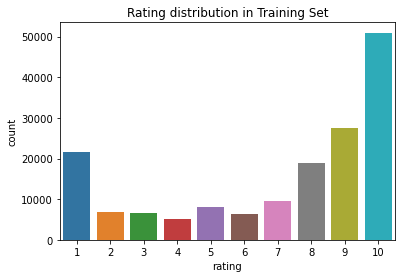

In [3]:
sns.countplot(train['rating'])
plt.title('Rating distribution in Training Set')

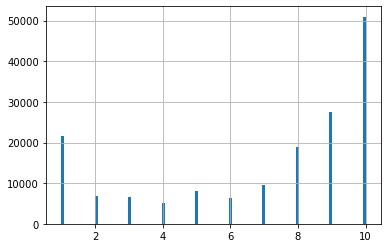

In [4]:
train['rating'].hist(bins=100)

### The distribution of sentiment. We can find that the negative to positive ratio is 1 to 2. 
### However, in our further classification task, we will not perform the oversampling to balance the dataset. Because in the sentiment analysis, the frequency of the words and letters has some specific distribution and if it is balanced, those features of the words or letters will lose.

Text(0.5, 1.0, 'Rating distribution in Training Set')

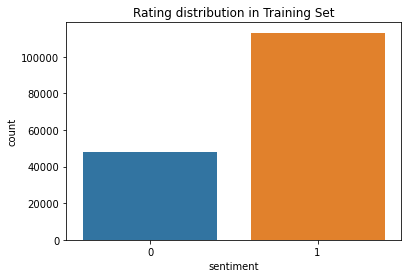

In [5]:
sns.countplot(train['sentiment'])
plt.title('Rating distribution in Training Set')

### The relation ship between the sentiment & the predicted sentiment. We can find it can be differed somehow based on the predicted sentiment

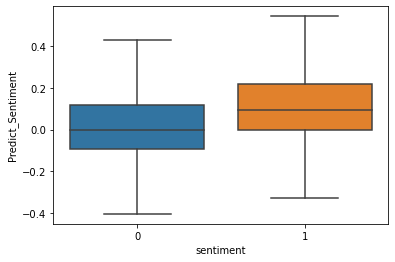

In [6]:
sns.boxplot(x='sentiment',y='Predict_Sentiment',data=train,showfliers=False)

### The relation ship between the sentiment & mean word length. We can find there is no significant difference on this feature.

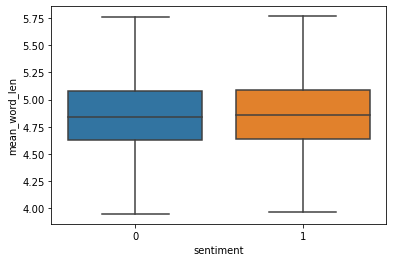

In [17]:
sns.boxplot(x='sentiment',y='mean_word_len',data=train,showfliers=False)

### The relation ship between the sentiment & count of positive words. We can find there is no significant difference on this feature.

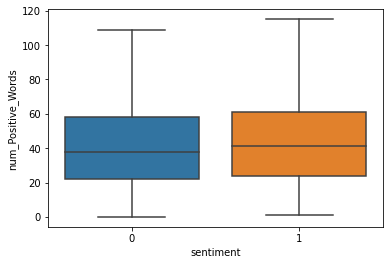

In [18]:
sns.boxplot(x='sentiment',y='num_Positive_Words',data=train,showfliers=False)

### The relation ship between the sentiment & count of negative words. We can find there is a significant difference, while the negative sentiment sample tend to have more negative words than the positive sentiment sample.

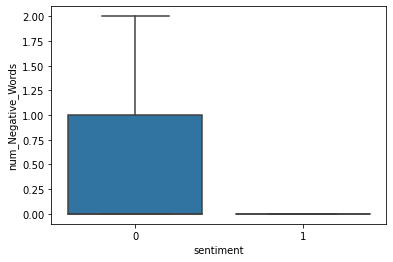

In [19]:
sns.boxplot(x='sentiment',y='num_Negative_Words',data=train,showfliers=False)

In [7]:
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'date', 'rating',
       'usefulCount', 'review_clean', 'Predict_Sentiment', 'sentiment',
       'count_sent', 'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len', 'num_Positive_Words',
       'num_Negative_Words'],
      dtype='object')

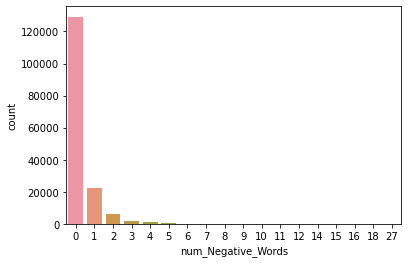

In [9]:
sns.countplot(train['num_Negative_Words'])

### We then check the relationship between the rating & usefulcount. We can find that the tendency is like, the more the usefulcount, the higher the rating.

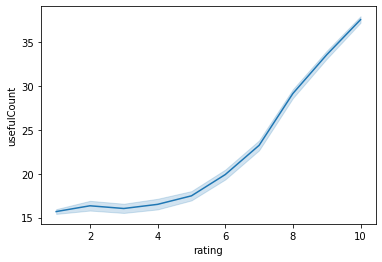

In [16]:
sns.lineplot(x='rating',y='usefulCount',data=train)

### Checked the ralationship between the rating & number of positive words, we can find the general tendency that the higher the rating, the more the positive words.

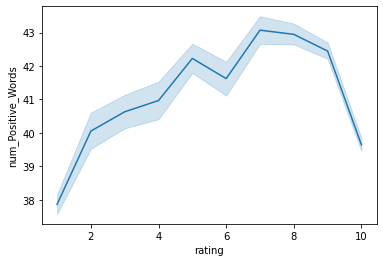

In [14]:
sns.lineplot(x='rating',y='num_Positive_Words',data=train)

### Checked the ralationship between the rating & number of negative words, we can find the general tendency that the higher the rating, the less the negative words.

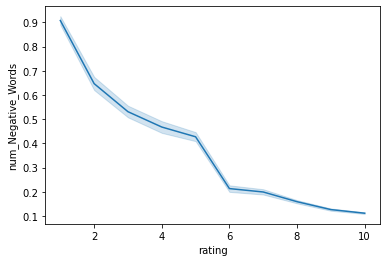

In [15]:
sns.lineplot(x='rating',y='num_Negative_Words',data=train)

### Checked the distribution of the mean word length, it likely to follow a normal distribution.

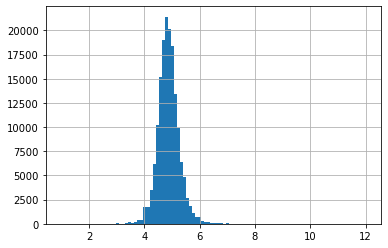

In [11]:
train['mean_word_len'].hist(bins=100)

## 3. Traditional Recomendation
### In this part, we have implemented 2 kinds of very traditional recomendation methods to our data. However, the performance is not that good, and the method is also a bit clumsy. 
### This may due to that our dataset is not a typical dataset for those recomendation technology as normally they are doing the recommendation based on user's rating while our dataset only has the condition and the general rating. 
### What is more, it can also be due to that the ML based recomendation technology is now out of date, while currently most of the companies are using the Deep Learning based recomendation technology instead.

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3.1Collabarate Filtering
### The main idea of collabrate filtering is to generate a matrix to reveal the relation ship between the users and items. Each user and item will have their own vector, and the based on the vector, the similar user & items will be identified.
### As in our dataset, there is no obvious users, so we used the conditions to be regarded as the 'user' to build the collabrate filtering model.

In [176]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

### Before that, we have identified that there are some faulty rows with faulty values in the condition column. So we will check the ratio of that and remove it.

In [150]:
## Get the faulty rows with wierd condition
wierdCondition=train[train['condition'].str.contains("users found this comment helpful.", na=False)]
wierdCondition

uniqueID        drugName                                    condition  \
1052        1480      Ultram ODT  44</span> users found this comment helpful.   
1187        1675         Uricalm  46</span> users found this comment helpful.   
1732        2458         Enulose  12</span> users found this comment helpful.   
2003        2881    Azo-Standard  15</span> users found this comment helpful.   
2555        3695   Darvocet A500   2</span> users found this comment helpful.   
...          ...             ...                                          ...   
160138    230649    Depo-Provera  45</span> users found this comment helpful.   
160143    230654    Depo-Provera  15</span> users found this comment helpful.   
160207    230747         Tazorac   3</span> users found this comment helpful.   
160253    230819  Remeron SolTab  29</span> users found this comment helpful.   
160530    231218        Hydromet   5</span> users found this comment helpful.   

                                                   review       date  rating  \
1052    "My experience with Ultram is fantastic. I sev...  16-Apr-12      10   
1187    "Great medication. Works fast and lasts all da...  12-Aug-10      10   
1732                               "Headache, flatulence"   4-Mar-14      10   
2003    "This medicine has helped me a number of times...  21-Feb-12       7   
2555    "I&#039;m taking darvocet for a severe toothac...   3-Mar-09       9   
...                                                   ...        ...     ...   
160138  "I have been on Depo for 18 years and until ju...  19-Mar-09       1   
160143  "I was on Depo Provera for almost 3 years, aft...  13-Jan-09      10   
160207  "Started this 11 weeks ago. I am so so sad rig...  31-May-16       2   
160253  "Excellent medication, only thing to work afte...  28-Jun-14       9   
160530                 "Amazing for pain and cough alike"  24-Jul-14       9   

        usefulCount                                       review_clean  \
1052             44  experi ultram fantast sever injur cycl franc t...   
1187             46  great medic work fast last day long long drink...   
1732             12                                     headach flatul   
2003             15  medicin help number time frequent get urinari ...   
2555              2  take darvocet sever toothach await oral surger...   
...             ...                                                ...   
160138           45  depo year recent would rate never period compl...   
160143           15  depo provera almost year daughter period entir...   
160207            3  start week ago sad right horribl hair loss pas...   
160253           29  excel medic thing work twenti year sleepless t...   
160530            5                               amaz pain cough alik   

        Predict_Sentiment  sentiment  ...  count_word  count_unique_word  \
1052             0.028571          1  ...          45                 42   
1187             0.233333          1  ...          15                 14   
1732             0.000000          1  ...           2                  2   
2003             0.043750          1  ...          26                 26   
2555            -0.166667          1  ...          17                 15   
...                   ...        ...  ...         ...                ...   
160138          -0.071429          0  ...          32                 30   
160143           0.166667          1  ...          34                 28   
160207          -0.160714          0  ...          40                 33   
160253           0.800000          1  ...          41                 37   
160530           0.000000          1  ...           4                  4   

        count_letters  count_punctuations  count_words_upper  \
1052              266                  15                  6   
1187               83                   5                  1   
1732               14                   3                  0   
2003            

In [151]:
len(wierdCondition)/len(train)

0.005581568420726224

### We can find that the ratio is low. So we will drop those rows.

In [177]:
train=train[~train['condition'].str.contains("users found this comment helpful.", na=False)]
train

uniqueID                   drugName                  condition  \
0              2        Medroxyprogesterone                 Amenorrhea   
1              3        Medroxyprogesterone  Abnormal Uterine Bleeding   
2              4        Medroxyprogesterone              Birth Control   
3              5        Medroxyprogesterone  Abnormal Uterine Bleeding   
4              7        Medroxyprogesterone  Abnormal Uterine Bleeding   
...          ...                        ...                        ...   
161266    232286  Amoxicillin / clavulanate                  Sinusitis   
161267    232288  Amoxicillin / clavulanate                  Sinusitis   
161268    232289  Amoxicillin / clavulanate    Urinary Tract Infection   
161269    232290  Amoxicillin / clavulanate               Otitis Media   
161270    232291  Amoxicillin / clavulanate                  Sinusitis   

                                                   review       date  rating  \
0       "I&#039;m 21 years old and recently found out ...  27-Oct-15      10   
1       "I have been on the shot 11 years and until a ...  27-Oct-15       8   
2       "Ive had four shots at this point. I was on bi...  26-Oct-15       9   
3       "I had a total of 3 shots. I got my first one ...  25-Oct-15       1   
4       "I&#039;m 18 and got this for heavy bleeding. ...  22-Oct-15       5   
...                                                   ...        ...     ...   
161266  "Don&#039;t ever use this, \r\nWhen I was 4 ye...  29-Jun-17       1   
161267  "For acute maxillary sinusitis. Day two, just ...  21-Jun-17       9   
161268  "I took Amox Clav 2x day for 7 days for my uri...  17-Jun-17       4   
161269  "Day 1 - serious pain and diminished hearing i...  16-Jun-17       1   
161270  "Every time I have had a sinus infection and b...  16-Jun-17      10   

        usefulCount                                       review_clean  \
0                11  year old recent found might pcos gotten period...   
1                 7  shot year month ago never period even spot mon...   
2                12  ive four shot point birth control pill year du...   
3                 4  total shot got first one leav hospit give birt...   
4                 6  got heavi bleed alway heard bc make gain weigh...   
...             ...                                                ...   
161266            8  ever use year old sick doctor give augmentin e...   
161267           14  acut maxillari sinus day two take third dose a...   
161268            2  took amox clav x day day urinari tract infect ...   
161269            0  day serious pain diminish hear right ear went ...   
161270           28  everi time sinus infect prescrib augmentin fee...   

        Predict_Sentiment  sentiment  ...  count_word  count_unique_word  \
0                0.179365          1  ...          55                 46   
1               -0.016667          1  ...          27                 21   
2                0.069444          1  ...          69                 53   
3                0.103333          0  ...          63                 56   
4                0.098052          0  ...          56                 50   
...                   ...        ...  ...         ...                ...   
161266          -0.206071          0  ...          24                 23   
161267           0.200000          1  ...          19                 18   
161268           0.107143          0  ...          50                 26   
161269           0.036054          0  ...          76                 61   
161270           0.500000          1  ...          12                 12   

        count_letters  count_punctuations  count_words_upper  \
0                 320                  26                  5   
1                 145                  12                  4   
2                 396                  21                  4   
3                 361                  21                 13   
4                 293               

In [178]:
test

uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review       date  rating  \
0      "I&#039;ve tried a few antidepressants over th...  28-Feb-12      10   
1      "My son has Crohn&#039;s disease and has done ...  17-May-09       8   
2                          "Quick reduction of symptoms"  29-Sep-17       9   
3      "Contrave combines drugs that were used for al...   5-Mar-17       9   
4      "I have been on this birth control for one cyc...  22-Oct-15       9   
...                                                  ...        ...     ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...  13-Sep-14      10   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...   8-Oct-16       9   
53763  "I&#039;m married, 34 years old and I have no ...  15-Nov-10       8   
53764  "I was prescribed Nucynta for severe neck/shou...  28-Nov-11       1   
53765                                      "It works!!!"  13-Sep-09       9   

       usefulCount                                       review_clean  \
0               22  tri antidepress year citalopram fluoxetin amit...   
1               17  son crohn diseas done well asacol no complaint...   
2                3                               quick reduct symptom   
3               35  contrav combin drug use alcohol smoke opioid c...   
4                4  birth control one cycl read review type simila...   
...            ...                                                ...   
53761           43  taken tamoxifen year side effect sever sweat d...   
53762           11  take lexapro escitaploprgram sinc februari fir...   
53763            7  marri year old no kid take pill hassl decid ge...   
53764           20  prescrib nucynta sever neck shoulder pain take...   
53765           46                                               work   

       Predict_Sentiment  sentiment  ...  count_word  count_unique_word  \
0              -0.122222          1  ...          37                 34   
1               0.150000          1  ...          26                 25   
2               0.333333          1  ...           3                  3   
3               0.700000          1  ...          65                 59   
4               0.210833          1  ...          66                 55   
...                  ...        ...  ...         ...                ...   
53761          -0.078571          1  ...          51                 42   
53762           0.106238          1  ...          72                 52   
53763           0.069949          1  ...          69                 52   
53764           0.000000          0  ...          18                 16   
53765           0.000000          1  ...           1                  1   

       count_letters  count_punctuations  count_words_upper  \
0                255                  22                  2   
1                147                  13                  0   
2                 20                   2                  0   
3                374                  42                 10   
4                386                  17                 10   
...              ...                 ...                ...   
53761            318                  13      

In [154]:
ratingAvg=train.groupby(['condition','drugName'])['rating'].mean().reset_index()
ratingAvg

condition        drugName     rating
0            ADHD        Adderall   8.331250
1            ADHD     Adderall XR   8.141509
2            ADHD  Adzenys XR-ODT   6.277778
3            ADHD      Amantadine   8.666667
4            ADHD     Amphetamine   6.613636
...           ...             ...        ...
7811  zen Shoulde    Indomethacin  10.000000
7812  zen Shoulde      Nabumetone   5.666667
7813  zen Shoulde        Naproxen   2.666667
7814  zen Shoulde         Relafen   7.000000
7815  zen Shoulde        Voltaren   8.000000

[7816 rows x 3 columns]

In [155]:
drugList=train['drugName'].drop_duplicates().reset_index(drop=True)
conditionList=train['condition'].drop_duplicates().reset_index(drop=True)

## The Collabarate Filtering matrix is built as below

In [156]:
CFMatrix=pd.DataFrame(0,index=conditionList,columns=drugList)
CFMatrix

drugName                              Medroxyprogesterone  Phenylephrine  \
condition                                                                  
Amenorrhea                                              0              0   
Abnormal Uterine Bleeding                               0              0   
Birth Control                                           0              0   
Endometrial Hyperplasia, Prophylaxis                    0              0   
Endometriosis                                           0              0   
...                                                   ...            ...   
Submental Fullness                                      0              0   
ungal Infection Prophylaxis                             0              0   
Histoplasmosis                                          0              0   
Sporotrichosis                                          0              0   
Aspergillosis, Aspergilloma                             0              0   

drugName                              Silodosin  Resorcinol / sulfur  \
condition                                                              
Amenorrhea                                    0                    0   
Abnormal Uterine Bleeding                     0                    0   
Birth Control                                 0                    0   
Endometrial Hyperplasia, Prophylaxis          0                    0   
Endometriosis                                 0                    0   
...                                         ...                  ...   
Submental Fullness                            0                    0   
ungal Infection Prophylaxis                   0                    0   
Histoplasmosis                                0                    0   
Sporotrichosis                                0                    0   
Aspergillosis, Aspergilloma                   0                    0   

drugName                              Methylin ER  Clemastine  \
condition                                                       
Amenorrhea                                      0           0   
Abnormal Uterine Bleeding                       0           0   
Birth Control                                   0           0   
Endometrial Hyperplasia, Prophylaxis            0           0   
Endometriosis                                   0           0   
...                                           ...         ...   
Submental Fullness                              0           0   
ungal Infection Prophylaxis                     0           0   
Histoplasmosis                                  0           0   
Sporotrichosis                                  0           0   
Aspergillosis, Aspergilloma                     0           0   

drugName                              Pentosan polysulfate sodium  \
condition                                                           
Amenorrhea                                                      0   
Abnormal Uterine Bleeding                                       0   
Birth Control                                                   0   
Endometrial Hyperplasia, Prophylaxis                            0   
Endometriosis                                                   0   
...                                                           ...   
Submental Fullness                                              0   
ungal Infection Prophylaxis                                     0   
Histoplasmosis                                                  0   
Sporotrichosis                                                  0   
Aspergillosis, Aspergilloma                                     0   

drugName                              Metoprolol Tartrate  Xeljanz XR  \
condition                                                               
Amenorrhea                                              0           0   
Abnormal Uterine Bleeding                               0           0   
Birth Control                         

In [157]:
for index,row in ratingAvg.iterrows():
    CFMatrix.loc[row['condition'],row['drugName']]=row['rating']

CFMatrix

drugName                              Medroxyprogesterone  Phenylephrine  \
condition                                                                  
Amenorrhea                                       7.911111            0.0   
Abnormal Uterine Bleeding                        3.290576            0.0   
Birth Control                                    5.515936            0.0   
Endometrial Hyperplasia, Prophylaxis             9.000000            0.0   
Endometriosis                                    5.868421            0.0   
...                                                   ...            ...   
Submental Fullness                               0.000000            0.0   
ungal Infection Prophylaxis                      0.000000            0.0   
Histoplasmosis                                   0.000000            0.0   
Sporotrichosis                                   0.000000            0.0   
Aspergillosis, Aspergilloma                      0.000000            0.0   

drugName                              Silodosin  Resorcinol / sulfur  \
condition                                                              
Amenorrhea                                  0.0                  0.0   
Abnormal Uterine Bleeding                   0.0                  0.0   
Birth Control                               0.0                  0.0   
Endometrial Hyperplasia, Prophylaxis        0.0                  0.0   
Endometriosis                               0.0                  0.0   
...                                         ...                  ...   
Submental Fullness                          0.0                  0.0   
ungal Infection Prophylaxis                 0.0                  0.0   
Histoplasmosis                              0.0                  0.0   
Sporotrichosis                              0.0                  0.0   
Aspergillosis, Aspergilloma                 0.0                  0.0   

drugName                              Methylin ER  Clemastine  \
condition                                                       
Amenorrhea                                    0.0         0.0   
Abnormal Uterine Bleeding                     0.0         0.0   
Birth Control                                 0.0         0.0   
Endometrial Hyperplasia, Prophylaxis          0.0         0.0   
Endometriosis                                 0.0         0.0   
...                                           ...         ...   
Submental Fullness                            0.0         0.0   
ungal Infection Prophylaxis                   0.0         0.0   
Histoplasmosis                                0.0         0.0   
Sporotrichosis                                0.0         0.0   
Aspergillosis, Aspergilloma                   0.0         0.0   

drugName                              Pentosan polysulfate sodium  \
condition                                                           
Amenorrhea                                                    0.0   
Abnormal Uterine Bleeding                                     0.0   
Birth Control                                                 0.0   
Endometrial Hyperplasia, Prophylaxis                          0.0   
Endometriosis                                                 0.0   
...                                                           ...   
Submental Fullness                                            0.0   
ungal Infection Prophylaxis                                   0.0   
Histoplasmosis                                                0.0   
Sporotrichosis                                                0.0   
Aspergillosis, Aspergilloma                                   0.0   

drugName                              Metoprolol Tartrate  Xeljanz XR  \
condition                                                               
Amenorrhea                                            0.0         0.0   
Abnormal Uterine Bleeding                             0.0         0.0   
Birth Control                         

In [158]:
CFMatrix.to_csv('CFMatrix_train.csv')

In [159]:
test=pd.read_csv('test.csv')
test


uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                          "Quick reduction of symptoms"       9  29-Sep-17   
3      "Contrave combines drugs that were used for al...       9   5-Mar-17   
4      "I have been on this birth control for one cyc...       9  22-Oct-15   
...                                                  ...     ...        ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...      10  13-Sep-14   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...       9   8-Oct-16   
53763  "I&#039;m married, 34 years old and I have no ...       8  15-Nov-10   
53764  "I was prescribed Nucynta for severe neck/shou...       1  28-Nov-11   
53765                                      "It works!!!"       9  13-Sep-09   

       usefulCount  
0               22  
1               17  
2                3  
3               35  
4                4  
...            ...  
53761           43  
53762           11  
53763            7  
53764           20  
53765           46  

[53766 rows x 7 columns]

In [160]:
test_CF=test[test['condition'].isin(conditionList)]
test_CF=test_CF[test_CF['drugName'].isin(drugList)]
test_CF

uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                          "Quick reduction of symptoms"       9  29-Sep-17   
3      "Contrave combines drugs that were used for al...       9   5-Mar-17   
4      "I have been on this birth control for one cyc...       9  22-Oct-15   
...                                                  ...     ...        ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...      10  13-Sep-14   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...       9   8-Oct-16   
53763  "I&#039;m married, 34 years old and I have no ...       8  15-Nov-10   
53764  "I was prescribed Nucynta for severe neck/shou...       1  28-Nov-11   
53765                                      "It works!!!"       9  13-Sep-09   

       usefulCount  
0               22  
1               17  
2                3  
3               35  
4                4  
...            ...  
53761           43  
53762           11  
53763            7  
53764           20  
53765           46  

[53183 rows x 7 columns]

In [161]:
from scipy import spatial

### We then built a similarity matrix to reveal the similarity between different drugs based on our collabarate filtered matrix.

In [162]:
Similarity_Drug=pd.DataFrame(0,index=drugList,columns=drugList)
for i in drugList:
    for j in drugList:
        simValue=1-spatial.distance.cosine(CFMatrix[i],CFMatrix[j])
        Similarity_Drug.loc[i,j]=simValue

Similarity_Drug

drugName                                  Medroxyprogesterone  Phenylephrine  \
drugName                                                                       
Medroxyprogesterone                                  1.000000            0.0   
Phenylephrine                                        0.000000            1.0   
Silodosin                                            0.000000            0.0   
Resorcinol / sulfur                                  0.000000            0.0   
Methylin ER                                          0.000000            0.0   
...                                                       ...            ...   
Crotamiton                                           0.000000            0.0   
Interferon beta-1b                                   0.000000            0.0   
Alrex                                                0.000000            0.0   
Amethia Lo                                           0.369333            0.0   
Monistat 1-Day or Night Combination Pack             0.000000            0.0   

drugName                                  Silodosin  Resorcinol / sulfur  \
drugName                                                                   
Medroxyprogesterone                             0.0                  0.0   
Phenylephrine                                   0.0                  0.0   
Silodosin                                       1.0                  0.0   
Resorcinol / sulfur                             0.0                  1.0   
Methylin ER                                     0.0                  0.0   
...                                             ...                  ...   
Crotamiton                                      0.0                  0.0   
Interferon beta-1b                              0.0                  0.0   
Alrex                                           0.0                  0.0   
Amethia Lo                                      0.0                  0.0   
Monistat 1-Day or Night Combination Pack        0.0                  0.0   

drugName                                  Methylin ER  Clemastine  \
drugName                                                            
Medroxyprogesterone                               0.0         0.0   
Phenylephrine                                     0.0         0.0   
Silodosin                                         0.0         0.0   
Resorcinol / sulfur                               0.0         0.0   
Methylin ER                                       1.0         0.0   
...                                               ...         ...   
Crotamiton                                        0.0         0.0   
Interferon beta-1b                                0.0         0.0   
Alrex                                             0.0         0.0   
Amethia Lo                                        0.0         0.0   
Monistat 1-Day or Night Combination Pack          0.0         0.0   

drugName                                  Pentosan polysulfate sodium  \
drugName                                                                
Medroxyprogesterone                                               0.0   
Phenylephrine                                                     0.0   
Silodosin                                                         0.0   
Resorcinol / sulfur                                               0.0   
Methylin ER                                                       0.0   
...                                                               ...   
Crotamiton                                                        0.0   
Interferon beta-1b                                                0.0   
Alrex                                                             0.0   
Amethia Lo                                                        0.0   
Monistat 1-Day or Night Combination Pack                          0.0   

drugName                                  Metoprolol Tartrate  Xeljanz XR  \
drugName                                     

In [163]:
Similarity_Drug=Similarity_Drug.replace(np.NaN,0)

In [164]:
Similarity_Drug.to_csv('Drug_Similarity.csv')

### Based on the similarity matrix, the top 5 most similar drugs is generated for each drug and listed in the below table.

In [165]:
top_5_similarDrugs=pd.DataFrame(columns=['drugName','1st','2nd','3rd','4th','5th'])

for drug in drugList:
    RankedDrugList=Similarity_Drug[drug].sort_values(ascending=False)
    drugsName=list(RankedDrugList.index)
    insertRow=pd.DataFrame([[drug,drugsName[1],drugsName[2],drugsName[3],drugsName[4],drugsName[5]]],columns=['drugName','1st','2nd','3rd','4th','5th'])
    top_5_similarDrugs=pd.concat([insertRow,top_5_similarDrugs])

top_5_similarDrugs=top_5_similarDrugs.reset_index(drop=True)
top_5_similarDrugs

drugName                    1st  \
0     Monistat 1-Day or Night Combination Pack           Butoconazole   
1                                   Amethia Lo  Ortho-Novum 7 / 7 / 7   
2                                        Alrex   Sulfacetamide sodium   
3                           Interferon beta-1b                Aubagio   
4                                   Crotamiton               Calamine   
...                                        ...                    ...   
3410                               Methylin ER            Atomoxetine   
3411                       Resorcinol / sulfur                Onexton   
3412                                 Silodosin                Proscar   
3413                             Phenylephrine                Prefrin   
3414                       Medroxyprogesterone           Depo-Provera   

                                           2nd              3rd  \
0     Monistat 1-Day or Night Combination Pack         Pedi-Dri   
1                                       Mirena          Balziva   
2                                        Zymar     Gatifloxacin   
3                            Dimethyl fumarate         Plegridy   
4                              Sarna Sensitive       Crotamiton   
...                                        ...              ...   
3410                                 Strattera          Ritalin   
3411                                  Absorica       Benzamycin   
3412                                   Rapaflo        Uroxatral   
3413                                Refresh PM  Visine Original   
3414                             Norethindrone        Jolivette   

                 4th                              5th  
0            Terazol                        Terazol 7  
1     Ortho Micronor                        CamreseLo  
2        Loteprednol                          Lotemax  
3       Mitoxantrone                         Copaxone  
4       Skeeter Stik                     HC-Derma-Pax  
...              ...                              ...  
3410     Amphetamine                       Ritalin-SR  
3411         PanOxyl  Benzoyl peroxide / erythromycin  
3412           Jalyn                          Avodart  
3413       Hypotears                 Tetrahydrozoline  
3414         Provera                     Progesterone  

[3415 rows x 6 columns]

In [166]:
top_5_similarDrugs.to_csv('SimilarDrugList.csv')

In [167]:
CFMatrix.loc[conditionList[0]]

drugName
Medroxyprogesterone                         7.911111
Phenylephrine                               0.000000
Silodosin                                   0.000000
Resorcinol / sulfur                         0.000000
Methylin ER                                 0.000000
                                              ...   
Crotamiton                                  0.000000
Interferon beta-1b                          0.000000
Alrex                                       0.000000
Amethia Lo                                  0.000000
Monistat 1-Day or Night Combination Pack    0.000000
Name: Amenorrhea, Length: 3415, dtype: float64

### We then built a similarity matrix to reveal the similarity between different conditions based on our collabarate filtered matrix.

In [168]:
Similarity_Condition=pd.DataFrame(0,index=conditionList,columns=conditionList)
for i in conditionList:
    for j in conditionList:
        simValue=1-spatial.distance.cosine(CFMatrix.loc[i],CFMatrix.loc[j])
        Similarity_Condition.loc[i,j]=simValue

Similarity_Condition

condition                             Amenorrhea  Abnormal Uterine Bleeding  \
condition                                                                     
Amenorrhea                              1.000000                   0.136973   
Abnormal Uterine Bleeding               0.136973                   1.000000   
Birth Control                           0.163137                   0.532996   
Endometrial Hyperplasia, Prophylaxis    0.696300                   0.076607   
Endometriosis                           0.224092                   0.545513   
...                                          ...                        ...   
Submental Fullness                      0.000000                   0.000000   
ungal Infection Prophylaxis             0.000000                   0.000000   
Histoplasmosis                          0.000000                   0.000000   
Sporotrichosis                          0.000000                   0.000000   
Aspergillosis, Aspergilloma             0.000000                   0.000000   

condition                             Birth Control  \
condition                                             
Amenorrhea                                 0.163137   
Abnormal Uterine Bleeding                  0.532996   
Birth Control                              1.000000   
Endometrial Hyperplasia, Prophylaxis       0.084369   
Endometriosis                              0.436079   
...                                             ...   
Submental Fullness                         0.000000   
ungal Infection Prophylaxis                0.000000   
Histoplasmosis                             0.000000   
Sporotrichosis                             0.000000   
Aspergillosis, Aspergilloma                0.000000   

condition                             Endometrial Hyperplasia, Prophylaxis  \
condition                                                                    
Amenorrhea                                                        0.696300   
Abnormal Uterine Bleeding                                         0.076607   
Birth Control                                                     0.084369   
Endometrial Hyperplasia, Prophylaxis                              1.000000   
Endometriosis                                                     0.213981   
...                                                                    ...   
Submental Fullness                                                0.000000   
ungal Infection Prophylaxis                                       0.000000   
Histoplasmosis                                                    0.000000   
Sporotrichosis                                                    0.000000   
Aspergillosis, Aspergilloma                                       0.000000   

condition                             Endometriosis  NaN  \
condition                                                  
Amenorrhea                                 0.224092  NaN   
Abnormal Uterine Bleeding                  0.545513  NaN   
Birth Control                              0.436079  NaN   
Endometrial Hyperplasia, Prophylaxis       0.213981  NaN   
Endometriosis                              1.000000  NaN   
...                                             ...  ...   
Submental Fullness                         0.000000  NaN   
ungal Infection Prophylaxis                0.000000  NaN   
Histoplasmosis                             0.000000  NaN   
Sporotrichosis                             0.000000  NaN   
Aspergillosis, Aspergilloma                0.000000  NaN   

condition                             Renal Cell Carcinoma  Eye Redness  \
condition                                                                 
Amenorrhea                                        0.091688          0.0   
Abnormal Uterine Bleeding                         0.015392          0.0   
Birth Control                                     0.016705          0.0   
Endometrial Hyperplasia, Prophylaxis              0.136075          0.0   
Endometrio

In [169]:
Similarity_Condition=Similarity_Condition.replace(np.NaN,0)
Similarity_Condition.to_csv('Condition_Similarity.csv')

### Based on the similarity matrix, the top 5 most similar conditions is generated for each drug and listed in the below table.

In [170]:
top_5_similarConditions=pd.DataFrame(columns=['condition','1st','2nd','3rd','4th','5th'])

for condition in conditionList:
    RankedConditionList=Similarity_Condition[condition].sort_values(ascending=False)
    conditionsName=list(RankedConditionList.index)
    insertRow=pd.DataFrame([[condition,conditionsName[1],conditionsName[2],conditionsName[3],conditionsName[4],conditionsName[5]]],columns=['conditionName','1st','2nd','3rd','4th','5th'])
    top_5_similarConditions=pd.concat([insertRow,top_5_similarConditions])

top_5_similarConditions=top_5_similarConditions.reset_index(drop=True)
top_5_similarConditions

conditionName  \
0             Aspergillosis, Aspergilloma   
1                          Sporotrichosis   
2                          Histoplasmosis   
3             ungal Infection Prophylaxis   
4                      Submental Fullness   
..                                    ...   
806                         Endometriosis   
807  Endometrial Hyperplasia, Prophylaxis   
808                         Birth Control   
809             Abnormal Uterine Bleeding   
810                            Amenorrhea   

                                      1st                          2nd  \
0                          Histoplasmosis  ungal Infection Prophylaxis   
1                          Histoplasmosis  ungal Infection Prophylaxis   
2                          Histoplasmosis  ungal Infection Prophylaxis   
3                          Histoplasmosis  ungal Infection Prophylaxis   
4             Aspergillosis, Aspergilloma          Underactive Thyroid   
..                                    ...                          ...   
806             Abnormal Uterine Bleeding                Birth Control   
807                            Amenorrhea   Progesterone Insufficiency   
808             Abnormal Uterine Bleeding                Endometriosis   
809                         Endometriosis                Birth Control   
810  Endometrial Hyperplasia, Prophylaxis   Progesterone Insufficiency   

                           3rd                        4th  \
0               Sporotrichosis                 Candidemia   
1               Sporotrichosis                 Candidemia   
2               Sporotrichosis                 Candidemia   
3               Sporotrichosis                 Candidemia   
4             Plaque Psoriasis                 Xerostomia   
..                         ...                        ...   
806              Ovarian Cysts  Polycystic Ovary Syndrome   
807    Perimenopausal Symptoms              Endometriosis   
808  Polycystic Ovary Syndrome              Ovarian Cysts   
809              Ovarian Cysts  Polycystic Ovary Syndrome   
810           Uterine Bleeding    Perimenopausal Symptoms   

                      5th condition  
0         Dermatophytosis       NaN  
1         Dermatophytosis       NaN  
2         Dermatophytosis       NaN  
3         Dermatophytosis       NaN  
4    Vitamin K Deficiency       NaN  
..                    ...       ...  
806            Amenorrhea       NaN  
807         Premature Lab       NaN  
808   Menstrual Disorders       NaN  
809   Menstrual Disorders       NaN  
810         Premature Lab       NaN  

[811 rows x 7 columns]

In [171]:
top_5_similarConditions.to_csv('SimilarConditionList.csv')

## Conclusion:
### The collabarate filtering was fisrtly published in 2006, which is too early, so it looks a bit clumsy and not that intelligent.

## 3.2 GBDT+LR
### This is also another traditional model published in 2014, however, it looks also not working that well in our dataset. This may due to that our dataset is not a typical user based dataset, while this technology were more used by the social network platform like Youtube, Facebook, etc.

In [172]:
from sklearn import preprocessing
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score, precision_recall_curve, roc_curve, average_precision_score

In [173]:
def PrintClassification(test,pred):
    print(classification_report(test,pred))
    cm=confusion_matrix(test,pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,cmap="coolwarm",annot=True,fmt='g')

### In the construction of training & testing set, we use the sentiment column as our class label, which is 1 when the rating higher than 5, and 0 when the rating lower than 5. Here, we consider that if the sentiment is 1 which means positive, then the drug is worthing in recommendation to the corresponding condition, otherwise, it will be considered as a bad recommendation.

In [191]:
X_train=train[['condition','drugName','date','usefulCount']]
y_train=train['sentiment']
test=test[test['condition'].isin(train['condition'])][test['drugName'].isin(train['drugName'])]
X_test=test[['condition','drugName','date','usefulCount']]
y_test=test['sentiment']

In [192]:
le_condition = preprocessing.LabelEncoder()
le_drug = preprocessing.LabelEncoder()
le_condition.fit(list(X_train['condition']))
le_drug.fit(list(X_train['drugName']))

LabelEncoder()

In [193]:
import time
import datetime

## For features, we encoded the drug and conditions, and used the label of them, along with the timestamp & useful count.

In [194]:
X_train['timeStamp']=X_train['date'].apply(lambda x:time.mktime(datetime.datetime.strptime(x, "%d-%b-%y").timetuple()))
X_test['timeStamp']=X_test['date'].apply(lambda x:time.mktime(datetime.datetime.strptime(x, "%d-%b-%y").timetuple()))

In [195]:
X_train['conditionLabel']=le_condition.transform(list(X_train['condition']))
X_train['drugLabel']=le_drug.transform(list(X_train['drugName']))
X_test['conditionLabel']=le_condition.transform(list(X_test['condition']))
X_test['drugLabel']=le_drug.transform(list(X_test['drugName']))

In [197]:
X_train=X_train[['conditionLabel','drugLabel','timeStamp','usefulCount']]
X_test=X_test[['conditionLabel','drugLabel','timeStamp','usefulCount']]

## Firstly, we will used a Gradient Boosting Decision Tree to generate a groups of the features vectors.

In [198]:
lgb_train = lgb.Dataset(X_train, 
                        y_train.values.reshape(y_train.shape[0],))
lgb_eval = lgb.Dataset(X_test, 
                       y_test.values.reshape(y_test.shape[0],), 
                       reference=lgb_train)
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 16,
    'num_trees': 10,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
gbm = lgb.train(params=params,
                train_set=lgb_train,
                num_boost_round=3000,
                valid_sets=None)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [200]:
num_leaf = 16

y_pred = gbm.predict(X_train,raw_score=False,pred_leaf=True)

transformed_training_matrix = np.zeros([len(y_pred),
                                        len(y_pred[0]) * num_leaf],
                                       dtype=np.int64)

for i in range(0,len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i]);
    transformed_training_matrix[i][temp] += 1

In [201]:
np.arange(len(y_pred[0]))* num_leaf

array([  0,  16,  32,  48,  64,  80,  96, 112, 128, 144])

In [202]:
transformed_training_matrix[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [203]:
y_pred[0]

array([13, 15, 12, 14,  4,  8, 14, 15, 12,  2])

In [204]:
X_test.loc[1]

conditionLabel    1.690000e+02
drugLabel         1.928000e+03
timeStamp         1.242490e+09
usefulCount       1.700000e+01
Name: 1, dtype: float64

In [205]:
y_pred = gbm.predict(X_test,pred_leaf=True)
transformed_testing_matrix = np.zeros([len(y_pred),
                                       len(y_pred[0]) * num_leaf],
                                      dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
	transformed_testing_matrix[i][temp] += 1

## The features vectors are then be transformed by the logistic regression for classification

In [209]:
lm_clf=LogisticRegression(penalty='l2',C=0.1)
lm_clf.fit(transformed_training_matrix,y_train.values.reshape(y_train.shape[0],))
y_pred_est = lm_clf.predict(transformed_testing_matrix)
y_pred_est

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.59      0.24      0.34     16050
           1       0.74      0.93      0.82     37131

    accuracy                           0.72     53181
   macro avg       0.67      0.59      0.58     53181
weighted avg       0.70      0.72      0.68     53181



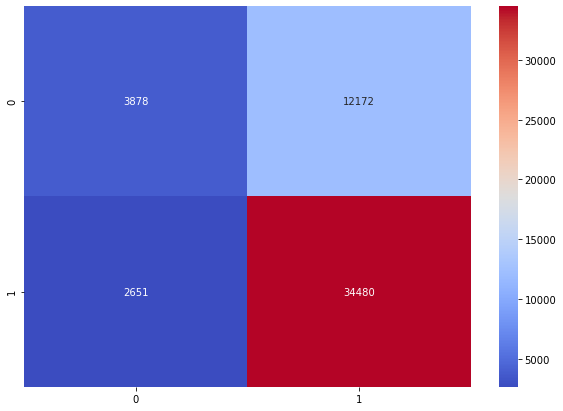

In [210]:
PrintClassification(label_test,y_pred_est)

In [211]:
roc_auc_score(label_test,y_pred_est)

0.5851120345067741

## From the statistics of the model performance above, we can only say that, this model works quite normal on this dataset. However, it can be due to the not suitable features, not suitable data, or not fined-tuned parameters.

## 4.Sentiment Analysis
## In this part, we have implemented the sentiment classification using 3 different groups of features, which are:
### 1. The word count vector generated by sklearn.feature_extraction
### 2. The self-defined review features along with useful count and NLTP predicted sentiment
### 3. The sel-defined review features along with our self-generated positive & negative words count.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import re
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

In [3]:
train.shape

(161245, 21)

In [4]:
train

uniqueID                   drugName                  condition  \
0              2        Medroxyprogesterone                 Amenorrhea   
1              3        Medroxyprogesterone  Abnormal Uterine Bleeding   
2              4        Medroxyprogesterone              Birth Control   
3              5        Medroxyprogesterone  Abnormal Uterine Bleeding   
4              7        Medroxyprogesterone  Abnormal Uterine Bleeding   
...          ...                        ...                        ...   
161266    232286  Amoxicillin / clavulanate                  Sinusitis   
161267    232288  Amoxicillin / clavulanate                  Sinusitis   
161268    232289  Amoxicillin / clavulanate    Urinary Tract Infection   
161269    232290  Amoxicillin / clavulanate               Otitis Media   
161270    232291  Amoxicillin / clavulanate                  Sinusitis   

                                                   review       date  rating  \
0       "I&#039;m 21 years old and recently found out ...  27-Oct-15      10   
1       "I have been on the shot 11 years and until a ...  27-Oct-15       8   
2       "Ive had four shots at this point. I was on bi...  26-Oct-15       9   
3       "I had a total of 3 shots. I got my first one ...  25-Oct-15       1   
4       "I&#039;m 18 and got this for heavy bleeding. ...  22-Oct-15       5   
...                                                   ...        ...     ...   
161266  "Don&#039;t ever use this, \r\nWhen I was 4 ye...  29-Jun-17       1   
161267  "For acute maxillary sinusitis. Day two, just ...  21-Jun-17       9   
161268  "I took Amox Clav 2x day for 7 days for my uri...  17-Jun-17       4   
161269  "Day 1 - serious pain and diminished hearing i...  16-Jun-17       1   
161270  "Every time I have had a sinus infection and b...  16-Jun-17      10   

        usefulCount                                       review_clean  \
0                11  year old recent found might pcos gotten period...   
1                 7  shot year month ago never period even spot mon...   
2                12  ive four shot point birth control pill year du...   
3                 4  total shot got first one leav hospit give birt...   
4                 6  got heavi bleed alway heard bc make gain weigh...   
...             ...                                                ...   
161266            8  ever use year old sick doctor give augmentin e...   
161267           14  acut maxillari sinus day two take third dose a...   
161268            2  took amox clav x day day urinari tract infect ...   
161269            0  day serious pain diminish hear right ear went ...   
161270           28  everi time sinus infect prescrib augmentin fee...   

        Predict_Sentiment  sentiment  ...  count_word  count_unique_word  \
0                0.179365          1  ...          55                 46   
1               -0.016667          1  ...          27                 21   
2                0.069444          1  ...          69                 53   
3                0.103333          0  ...          63                 56   
4                0.098052          0  ...          56                 50   
...                   ...        ...  ...         ...                ...   
161266          -0.206071          0  ...          24                 23   
161267           0.200000          1  ...          19                 18   
161268           0.107143          0  ...          50                 26   
161269           0.036054          0  ...          76                 61   
161270           0.500000          1  ...          12                 12   

        count_letters  count_punctuations  count_words_upper  \
0                 320                  26                  5   
1                 145                  12                  4   
2                 396                  21                  4   
3                 361                  21                 13   
4                 293               

## 4.1 Sentiment Analysis by Word Vectors
### In this part, we will only use the word vector itsefl as the train features.

In [7]:
## nltk.download('stopwords')

### We will build the word vectors based on the cleaned review for both training & testing set.

In [3]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(4, 4))

In [4]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [5]:
train_data_features = pipeline.fit_transform(train['review_clean'])

In [11]:
a=train_data_features[1].toarray()
a[a==0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
test_data_features = pipeline.fit_transform(test['review_clean'])

In [7]:
y_train=train['sentiment']
y_test=test['sentiment']

In [8]:
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, precision_recall_curve, roc_curve, average_precision_score

In [9]:
def PrintClassification(test,pred):
    print(classification_report(test,pred))
    cm=confusion_matrix(test,pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,cmap="coolwarm",annot=True,fmt='g')

In [10]:
from sklearn.model_selection import GridSearchCV

## KNN for review words count vector feature to classify the sentiment

In [17]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.28      0.06      0.10     16207
           1       0.70      0.94      0.80     37557

    accuracy                           0.67     53764
   macro avg       0.49      0.50      0.45     53764
weighted avg       0.57      0.67      0.59     53764



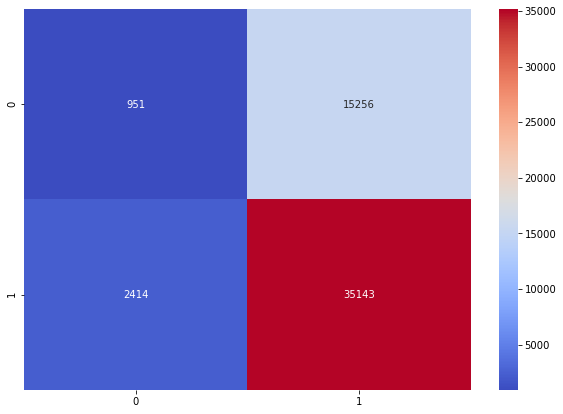

In [19]:
knn=KNeighborsClassifier()
knn.fit(train_data_features,y_train)
y_pred=knn.predict(test_data_features)
PrintClassification(y_test,y_pred)

## We can find that the performance is a bit poor. Now we try to fine-tune the parameters.

In [20]:
knn=KNeighborsClassifier()

k_range = [100,200,300]
leaf_range = list(range(1,2))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)
gridKNN = GridSearchCV(knn,param_gridknn,cv=10,scoring='accuracy',verbose=1)
gridKNN.fit(train_data_features,y_train)
print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
best score is: 0.7647367087244398
best params are: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 100, 'weights': 'distance'}
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 231.5min finished


In [21]:
print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))

best score is: 0.7647367087244398
best params are: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 100, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.29      0.06      0.10     16207
           1       0.70      0.94      0.80     37557

    accuracy                           0.67     53764
   macro avg       0.50      0.50      0.45     53764
weighted avg       0.58      0.67      0.59     53764



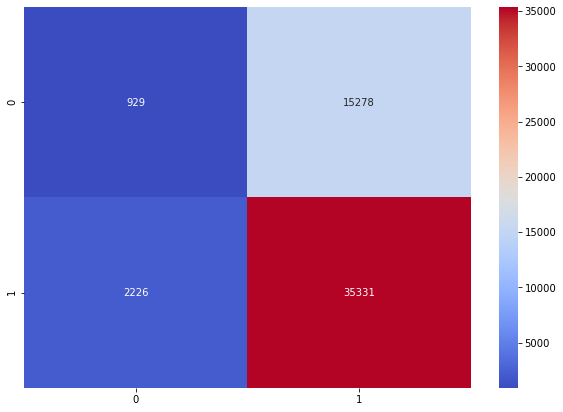

In [22]:
knn_clf=gridKNN.best_estimator_
y_pred=knn_clf.predict(test_data_features)
PrintClassification(y_test,y_pred)

## After the parameter tuning, the resuilt is still poor.

In [24]:
import joblib

In [25]:
joblib.dump(knn_clf,'KNN(Best)-ForWordVectorBased.pkl')

['KNN(Best)-ForWordVectorBased.pkl']

## So, we then try different model, which is the SVM, always be considered as a good classifiers to verify the performance.

In [11]:
from sklearn.svm import SVC

In [12]:
svc=SVC(probability=True)
svc.fit(train_data_features,y_train)

SVC(probability=True)

In [13]:
y_pred=svc.predict(test_data_features)

              precision    recall  f1-score   support

           0       0.31      0.05      0.09     16207
           1       0.70      0.95      0.80     37557

    accuracy                           0.68     53764
   macro avg       0.50      0.50      0.45     53764
weighted avg       0.58      0.68      0.59     53764



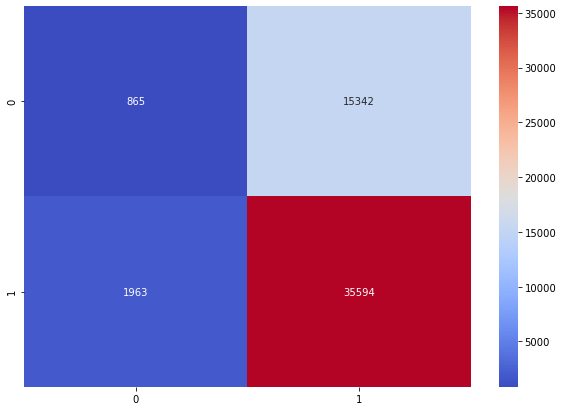

In [14]:
PrintClassification(y_test,y_pred)

## However, the performance is still not good. So, we will try our 2nd groups of the features for the classification task instead.

## 4.2 Sentiment Analysis by Self-Defiend Features from Review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import re
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

In [3]:
train.shape

(161245, 21)

In [4]:
train

uniqueID                   drugName                  condition  \
0              2        Medroxyprogesterone                 Amenorrhea   
1              3        Medroxyprogesterone  Abnormal Uterine Bleeding   
2              4        Medroxyprogesterone              Birth Control   
3              5        Medroxyprogesterone  Abnormal Uterine Bleeding   
4              7        Medroxyprogesterone  Abnormal Uterine Bleeding   
...          ...                        ...                        ...   
161266    232286  Amoxicillin / clavulanate                  Sinusitis   
161267    232288  Amoxicillin / clavulanate                  Sinusitis   
161268    232289  Amoxicillin / clavulanate    Urinary Tract Infection   
161269    232290  Amoxicillin / clavulanate               Otitis Media   
161270    232291  Amoxicillin / clavulanate                  Sinusitis   

                                                   review       date  rating  \
0       "I&#039;m 21 years old and recently found out ...  27-Oct-15      10   
1       "I have been on the shot 11 years and until a ...  27-Oct-15       8   
2       "Ive had four shots at this point. I was on bi...  26-Oct-15       9   
3       "I had a total of 3 shots. I got my first one ...  25-Oct-15       1   
4       "I&#039;m 18 and got this for heavy bleeding. ...  22-Oct-15       5   
...                                                   ...        ...     ...   
161266  "Don&#039;t ever use this, \r\nWhen I was 4 ye...  29-Jun-17       1   
161267  "For acute maxillary sinusitis. Day two, just ...  21-Jun-17       9   
161268  "I took Amox Clav 2x day for 7 days for my uri...  17-Jun-17       4   
161269  "Day 1 - serious pain and diminished hearing i...  16-Jun-17       1   
161270  "Every time I have had a sinus infection and b...  16-Jun-17      10   

        usefulCount                                       review_clean  \
0                11  year old recent found might pcos gotten period...   
1                 7  shot year month ago never period even spot mon...   
2                12  ive four shot point birth control pill year du...   
3                 4  total shot got first one leav hospit give birt...   
4                 6  got heavi bleed alway heard bc make gain weigh...   
...             ...                                                ...   
161266            8  ever use year old sick doctor give augmentin e...   
161267           14  acut maxillari sinus day two take third dose a...   
161268            2  took amox clav x day day urinari tract infect ...   
161269            0  day serious pain diminish hear right ear went ...   
161270           28  everi time sinus infect prescrib augmentin fee...   

        Predict_Sentiment  sentiment  ...  count_word  count_unique_word  \
0                0.179365          1  ...          55                 46   
1               -0.016667          1  ...          27                 21   
2                0.069444          1  ...          69                 53   
3                0.103333          0  ...          63                 56   
4                0.098052          0  ...          56                 50   
...                   ...        ...  ...         ...                ...   
161266          -0.206071          0  ...          24                 23   
161267           0.200000          1  ...          19                 18   
161268           0.107143          0  ...          50                 26   
161269           0.036054          0  ...          76                 61   
161270           0.500000          1  ...          12                 12   

        count_letters  count_punctuations  count_words_upper  \
0                 320                  26                  5   
1                 145                  12                  4   
2                 396                  21                  4   
3                 361                  21                 13   
4                 293               

In [5]:
## nltk.download('stopwords')

In [6]:
y_train=train['sentiment']
y_test=test['sentiment']

In [7]:
def PrintClassification(test,pred):
    print(classification_report(test,pred))
    cm=confusion_matrix(test,pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,cmap="coolwarm",annot=True,fmt='g')

In [8]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

## Use useful count & self-defined features in review for classification

## Fistly, we used the Light GBM model for the classification task.
### Light GBM: LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages: Faster training speed and higher efficiency. Lower memory usage.

In [9]:
X_train_lgbm_1=train[['usefulCount']]
X_test_lgbm_1=test[['usefulCount']]

## Firstly, we try only using the useful count as the feature for our classification

In [10]:
clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(X_train_lgbm_1, y_train, 
        eval_set= [(X_train_lgbm_1, y_train), (X_test_lgbm_1, y_test)], 
        verbose=100, early_stopping_rounds=100  #30
    )

y_pred = clf.predict(X_test_lgbm_1)

Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.57072	valid_1's binary_logloss: 0.573319
Early stopping, best iteration is:
[87]	training's binary_logloss: 0.570793	valid_1's binary_logloss: 0.573312


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16207
           1       0.70      1.00      0.82     37557

    accuracy                           0.70     53764
   macro avg       0.35      0.50      0.41     53764
weighted avg       0.49      0.70      0.57     53764



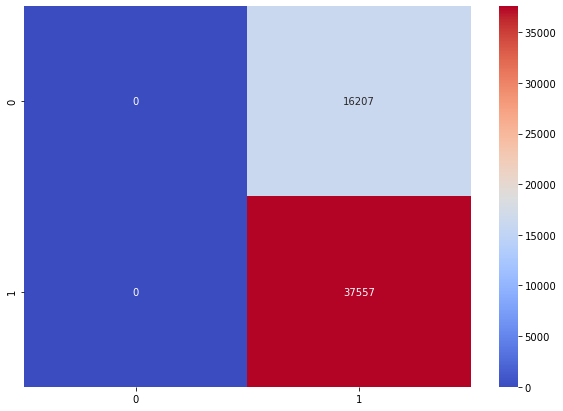

In [11]:
PrintClassification(y_test,y_pred)

## The performance is too bad. So, we will now apply our self-defined features instead.

In [12]:
import string
import nltk
from nltk.corpus import stopwords

In [13]:
stops = set(stopwords.words('english'))
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

## The features applied here is as below columns list included.

In [14]:
columns=['usefulCount','count_sent','count_word', 'count_unique_word', 'count_letters', 'count_punctuations','count_words_upper', 'count_words_title','count_stopwords', 'mean_word_len']
X_train_2=train[columns]
X_test_2=test[columns]

In [15]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(X_train_2, y_train, 
        eval_set= [(X_train_2, y_train), (X_test_2, y_test)], 
        verbose=100, early_stopping_rounds=100  #30
    )



Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.550714	valid_1's binary_logloss: 0.560648
[200]	training's binary_logloss: 0.539418	valid_1's binary_logloss: 0.556711
[300]	training's binary_logloss: 0.530501	valid_1's binary_logloss: 0.553493
[400]	training's binary_logloss: 0.521221	valid_1's binary_logloss: 0.550303
[500]	training's binary_logloss: 0.51255	valid_1's binary_logloss: 0.547211
[600]	training's binary_logloss: 0.504851	valid_1's binary_logloss: 0.544141
[700]	training's binary_logloss: 0.497373	valid_1's binary_logloss: 0.541539
[800]	training's binary_logloss: 0.490307	valid_1's binary_logloss: 0.538863
[900]	training's binary_logloss: 0.483388	valid_1's binary_logloss: 0.536285
[1000]	training's binary_logloss: 0.476634	valid_1's binary_logloss: 0.533925
[1100]	training's binary_logloss: 0.469553	valid_1's binary_logloss: 0.531677
[1200]	training's binary_logloss: 0.463435	valid_1's binary_logloss: 0.529469
[1300]	train

LGBMClassifier(max_depth=7, min_child_weight=2, min_split_gain=0.01,
               n_estimators=10000, num_leaves=30, reg_alpha=0.1, reg_lambda=0.1,
               silent=-1, subsample=0.9, verbose=-1)

In [16]:
y_pred = clf.predict(X_test_2)

              precision    recall  f1-score   support

           0       0.78      0.55      0.64     16207
           1       0.83      0.93      0.88     37557

    accuracy                           0.82     53764
   macro avg       0.80      0.74      0.76     53764
weighted avg       0.81      0.82      0.81     53764



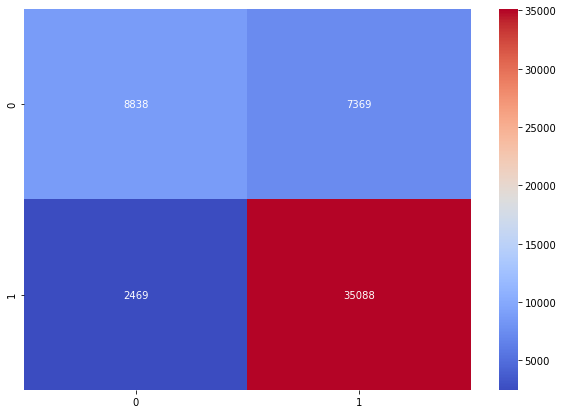

In [17]:
PrintClassification(y_test,y_pred)

## It is obviously that the performance improved a lot.

## After that, we added the predicted sentiment as one more feature.

In [18]:
columns.append('Predict_Sentiment')

In [19]:
X_train_3=train[columns]
X_test_3=test[columns]

In [20]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(X_train_3, y_train, 
        eval_set= [(X_train_3, y_train), (X_test_3, y_test)], 
        verbose=100, early_stopping_rounds=100  #30
    )


Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.522154	valid_1's binary_logloss: 0.532505
[200]	training's binary_logloss: 0.509935	valid_1's binary_logloss: 0.527906
[300]	training's binary_logloss: 0.499231	valid_1's binary_logloss: 0.523875
[400]	training's binary_logloss: 0.489459	valid_1's binary_logloss: 0.520442
[500]	training's binary_logloss: 0.479888	valid_1's binary_logloss: 0.516887
[600]	training's binary_logloss: 0.471315	valid_1's binary_logloss: 0.513685
[700]	training's binary_logloss: 0.462895	valid_1's binary_logloss: 0.510502
[800]	training's binary_logloss: 0.455035	valid_1's binary_logloss: 0.507495
[900]	training's binary_logloss: 0.447025	valid_1's binary_logloss: 0.504343
[1000]	training's binary_logloss: 0.440375	valid_1's binary_logloss: 0.501756
[1100]	training's binary_logloss: 0.432957	valid_1's binary_logloss: 0.49889
[1200]	training's binary_logloss: 0.426127	valid_1's binary_logloss: 0.496234
[1300]	train

LGBMClassifier(max_depth=7, min_child_weight=2, min_split_gain=0.01,
               n_estimators=10000, num_leaves=30, reg_alpha=0.1, reg_lambda=0.1,
               silent=-1, subsample=0.9, verbose=-1)

In [21]:
y_pred = clf.predict(X_test_3)

              precision    recall  f1-score   support

           0       0.82      0.67      0.73     16207
           1       0.87      0.94      0.90     37557

    accuracy                           0.85     53764
   macro avg       0.84      0.80      0.82     53764
weighted avg       0.85      0.85      0.85     53764



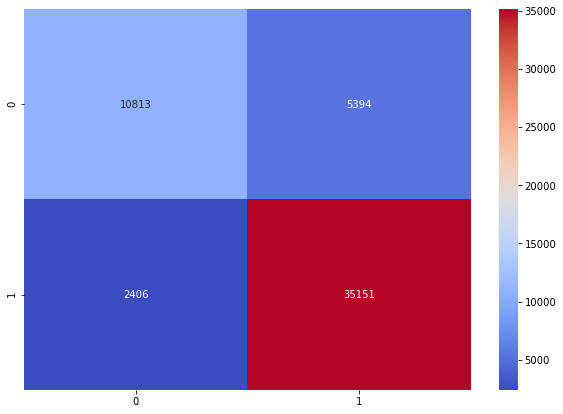

In [22]:
PrintClassification(y_test,y_pred)

## Fortunately, we have got a best performance comparing with the models previously mentioned.

In [23]:
joblib.dump(clf,'LightGBM-ForSelfDefinedFeatures.pkl')

['LightGBM-ForSelfDefinedFeatures.pkl']

In [24]:
fold_importance_df = pd.DataFrame()
feature_importance_df = pd.DataFrame()
fold_importance_df["feature"] = columns
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

## Checking the feature importance, we found that the predict_sentiment has the dominated influence during the classification, following by the mean of the word length and useful count

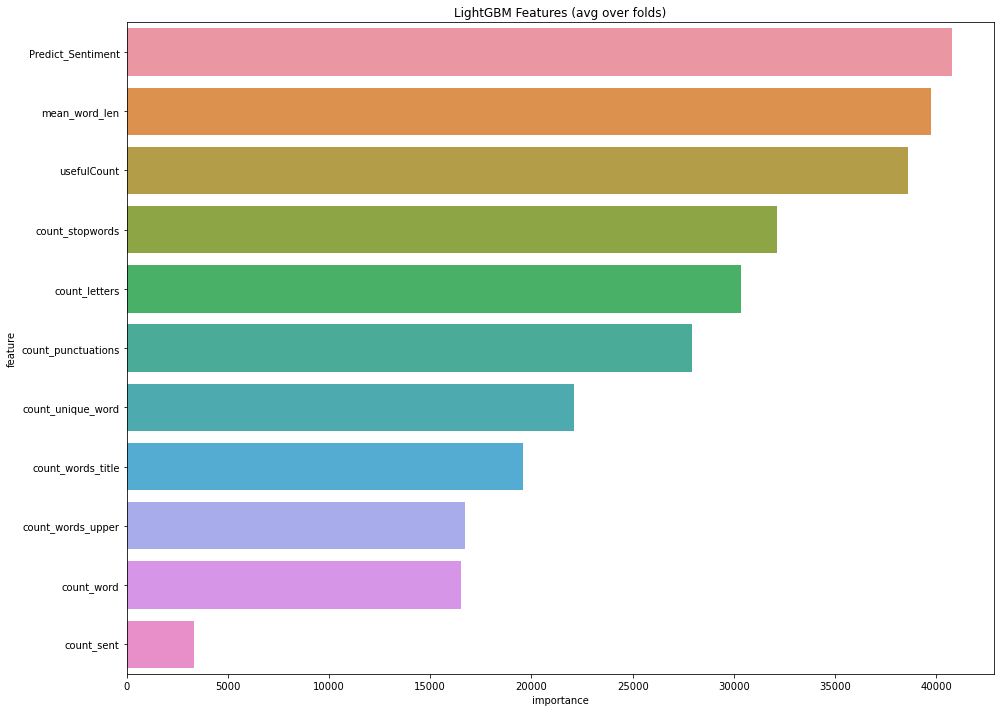

In [25]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

## KNN
### We then try the KNN model for classification.

## Fisrtly, we used the default parameters for KNN model training and predition

In [26]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.52      0.40      0.45     16207
           1       0.76      0.84      0.80     37557

    accuracy                           0.71     53764
   macro avg       0.64      0.62      0.63     53764
weighted avg       0.69      0.71      0.69     53764



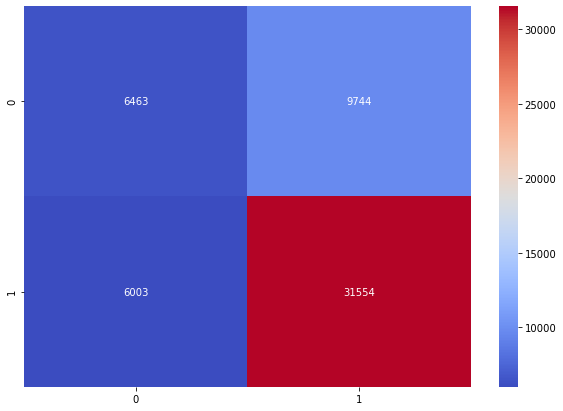

In [27]:
knn=KNeighborsClassifier()
knn.fit(X_train_3,y_train)
y_pred=knn.predict(X_test_3)
PrintClassification(y_test,y_pred)

## As we can see that the prediction result is quite poor, so we hereby fine tune the paramenters

In [65]:
knn=KNeighborsClassifier() 

In [66]:
k_range = [100,200,300]
leaf_range = list(range(1,2))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)
gridKNN = GridSearchCV(knn,param_gridknn,cv=10,scoring='accuracy',verbose=1)
gridKNN.fit(X_train_3,y_train)
print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 119.7min finished
best score is: 0.8592946332589101
best params are: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 300, 'weights': 'distance'}


## Then, we use the parameter with the best performance for classification

In [67]:
knn_clf = gridKNN.best_estimator_

In [68]:
y_pred=knn_clf.predict(X_test_3)

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     16207
           1       0.86      0.99      0.92     37557

    accuracy                           0.88     53764
   macro avg       0.92      0.81      0.84     53764
weighted avg       0.89      0.88      0.87     53764



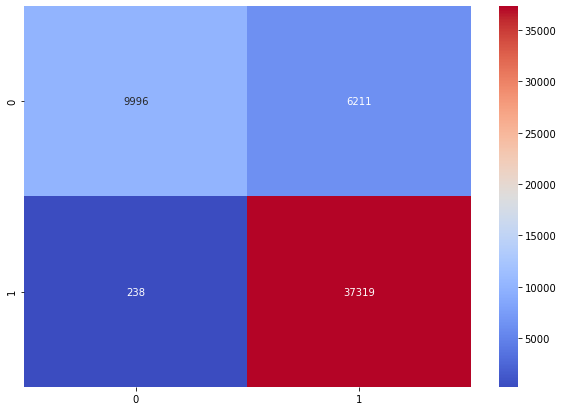

In [69]:
PrintClassification(y_test,y_pred)

## From the confusion matrix & the classification report above, we find that surprisingly, the performance improved significantly.

In [70]:
joblib.dump(knn_clf,'KNN(Best)-ForSelfDefinedFeatures.pkl')

['KNN(Best)-ForSelfDefinedFeatures.pkl']

## Then, we try SVM for classification.

In [8]:
from sklearn.svm import SVC

In [9]:
svc=SVC(probability=True)
svc.fit(X_train_3,y_train)

SVC(probability=True)

In [12]:
y_pred=svc.predict(X_test_3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16207
           1       0.70      1.00      0.82     37557

    accuracy                           0.70     53764
   macro avg       0.35      0.50      0.41     53764
weighted avg       0.49      0.70      0.57     53764



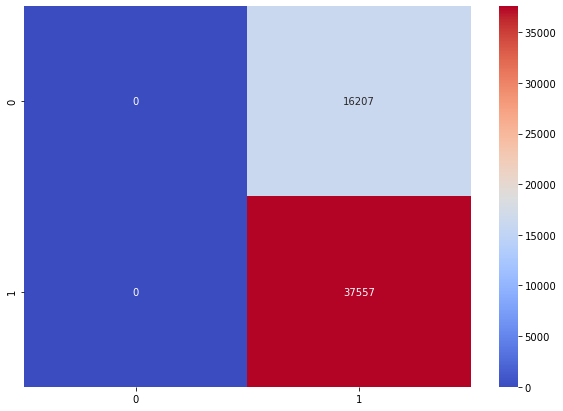

In [13]:
PrintClassification(y_test,y_pred)


### The performance of SVM is not accpetable, while the measurement of label 0 are all 0, which means completely not working on identifying label 0. So, the SVM will out of our consideration.

## We then try the XGBoost

In [75]:
from xgboost import XGBClassifier
import xgboost as xgb

In [76]:
xgbc = XGBClassifier()
xgbc.fit(X_train_3,y_train)

[13:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred=xgbc.predict(X_test_3)

              precision    recall  f1-score   support

           0       0.62      0.30      0.40     16207
           1       0.75      0.92      0.83     37557

    accuracy                           0.73     53764
   macro avg       0.69      0.61      0.62     53764
weighted avg       0.71      0.73      0.70     53764



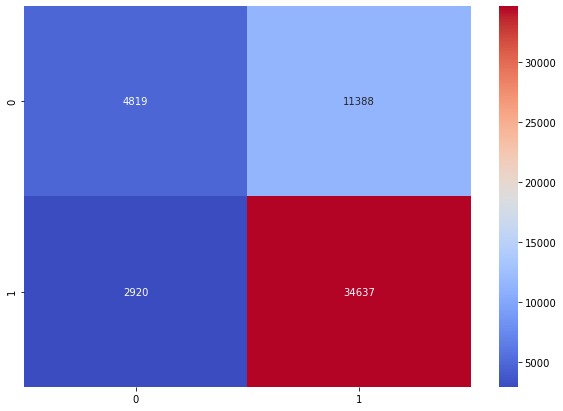

In [78]:
PrintClassification(y_test,y_pred)

### The performance of XGBoost is somehow acceptable, but is not that good as the best KNN and the best Light GBM.

## Then, we try the random forest.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf=RandomForestClassifier()
rf.fit(X_train_3,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.87      0.72      0.79     16207
           1       0.89      0.95      0.92     37557

    accuracy                           0.88     53764
   macro avg       0.88      0.84      0.85     53764
weighted avg       0.88      0.88      0.88     53764



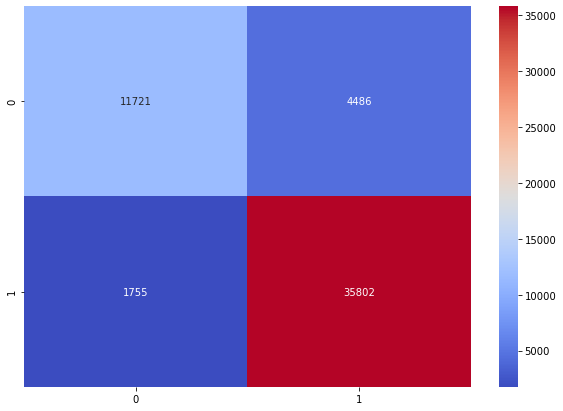

In [30]:
y_pred=rf.predict(X_test_3)
PrintClassification(y_test,y_pred)

## Surprisingly, the performance of randomforest is also quite outstanding.

In [31]:
joblib.dump(rf,'RandomForest-ForSelfDefinedFeatures.pkl')

['RandomForest-ForSelfDefinedFeatures.pkl']

In [32]:
import shap

## Checking the feature importance, we found that the useful count is more dominated here, following by the predicted sentiment.

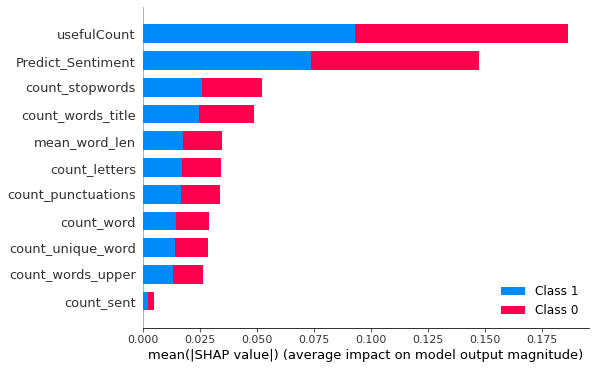

In [33]:
randomforest_explainer = shap.TreeExplainer(rf)
shap_values = randomforest_explainer.shap_values(shap.sample(X_test_3,100))
feature_names=list(X_test_3.columns)
shap.summary_plot(shap_values, features=X_test_3, feature_names=feature_names,plot_type="bar")

## Then, we also try the Naive Bayes model for classification.

In [34]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.87      0.72      0.79     16207
           1       0.89      0.95      0.92     37557

    accuracy                           0.88     53764
   macro avg       0.88      0.84      0.85     53764
weighted avg       0.88      0.88      0.88     53764



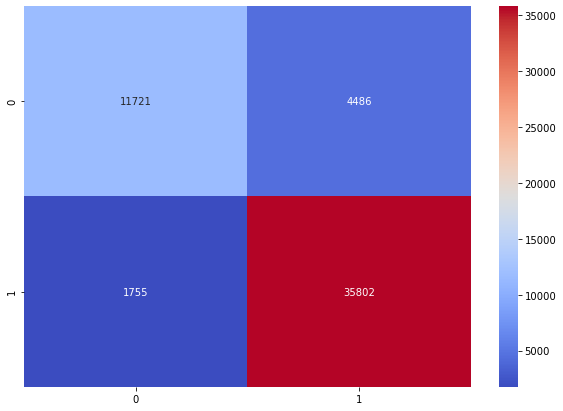

In [35]:
nb = GaussianNB()
nb.fit(X_train_3,y_train)
Y_val_pred=nb.predict(X_test_3)
PrintClassification(y_test,y_pred)

## Surprisingly, it also works perfect!!

In [36]:
joblib.dump(nb,'NaiveBayes-ForSelfDefinedFeatures.pkl')

['NaiveBayes-ForSelfDefinedFeatures.pkl']

In [37]:
from sklearn.inspection import permutation_importance

In [38]:
imps = permutation_importance(nb, X_test_3, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

In [41]:
feature_names=list(X_test_3.columns)
len(feature_names)

11

## Checking the feature importance, the predicted sentiment is also dominating here, following by the useful count.

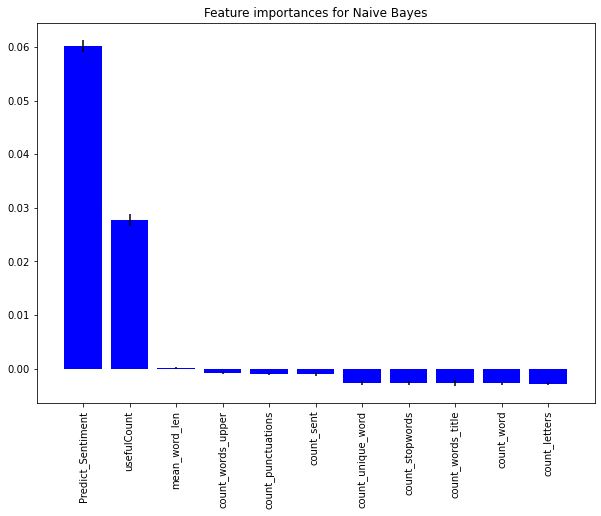

In [43]:
plt.figure(figsize=(10, 7))
plt.title("Feature importances for Naive Bayes")
plt.bar(range(11), importances[indices], color="b", yerr=std[indices][0:12], align="center")
plt.xticks(range(11), [feature_names[indices[i]] for i in range(11)],rotation=90)
plt.xlim([-1, 11])
plt.show()

In [44]:
from sklearn.ensemble import VotingClassifier
import sklearn

In [45]:
knn=joblib.load('KNN(Best)-ForSelfDefinedFeatures.pkl')
lgbm=joblib.load('LightGBM-ForSelfDefinedFeatures.pkl')

## Lastly, we built a voting classifier, combining all the models that have the precision higher than 80%(considering 80% as a threshold to distinguish the good or bad models) for hard voting.

In [46]:
e=[('KNN',knn),('RandomForest',rf),('LightGBM',lgbm),('NaiveBayes',nb)]

In [47]:
vc= VotingClassifier(estimators=e,voting='hard')
vc.fit(X_train_3,y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(leaf_size=1, n_neighbors=300,
                                                   weights='distance')),
                             ('RandomForest', RandomForestClassifier()),
                             ('LightGBM',
                              LGBMClassifier(max_depth=7, min_child_weight=2,
                                             min_split_gain=0.01,
                                             n_estimators=10000, num_leaves=30,
                                             reg_alpha=0.1, reg_lambda=0.1,
                                             silent=-1, subsample=0.9,
                                             verbose=-1)),
                             ('NaiveBayes', GaussianNB())])

              precision    recall  f1-score   support

           0       0.86      0.74      0.79     16207
           1       0.89      0.95      0.92     37557

    accuracy                           0.88     53764
   macro avg       0.87      0.84      0.86     53764
weighted avg       0.88      0.88      0.88     53764



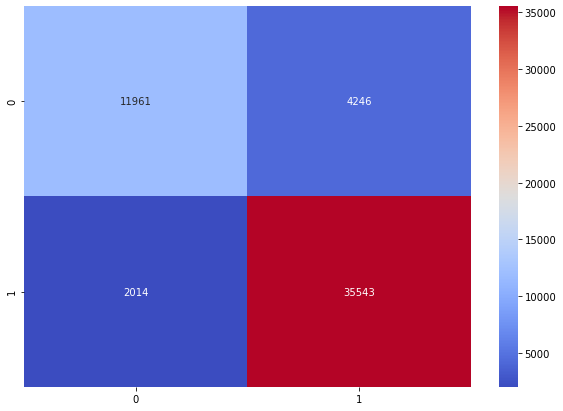

In [49]:
y_pred=vc.predict(X_test_3)
PrintClassification(y_test,y_pred)

## The performance is good as expected.

In [48]:
joblib.dump(vc,'VotingClassifier-ForSelfDefinedFeatures.pkl')

['VotingClassifier-ForSelfDefinedFeatures.pkl']

## After that, we have done a performance comparison & evaluation between different models.

In [32]:
ModelPerformance=pd.read_excel('PerformanceEvaluation.xlsx')
ModelPerformance

FeatureSelected                                  Model  \
0   SelfDefiendFeature      LightGBM(Using Only Useful Count)   
1   SelfDefiendFeature  LightGBM(Using Self Defined Features)   
2   SelfDefiendFeature    KNN(Before Fine-tune the Parameter)   
3   SelfDefiendFeature     KNN(After Fine-tune the Parameter)   
4   SelfDefiendFeature                                    SVM   
5   SelfDefiendFeature                                XGBoost   
6   SelfDefiendFeature                           RandomForest   
7   SelfDefiendFeature                             NavieBayes   
8   SelfDefiendFeature                       VotingClassifier   
9     UsingEmotionDict                     LogisticRegression   
10    UsingEmotionDict    KNN(Before Fine-tune the Parameter)   
11    UsingEmotionDict         KNN(Using Simplified Features)   
12    UsingEmotionDict     KNN(After Fine-tune the Parameter)   
13    UsingEmotionDict                               LightGBM   
14    UsingEmotionDict                                XGBoost   
15    UsingEmotionDict                                    SVM   
16    UsingEmotionDict                           RandomForest   
17    UsingEmotionDict                             NavieBayes   
18    UsingEmotionDict                       VotingClassifier   

    Precision-Label 0  Recall-Label 0  F1-Score-Label 0  Precision-Label 1  \
0                0.00            0.00              0.00               0.70   
1                0.82            0.67              0.73               0.87   
2                0.52            0.40              0.45               0.76   
3                0.98            0.62              0.76               0.86   
4                0.00            0.00              0.00               0.70   
5                0.62            0.30              0.40               0.75   
6                0.87            0.72              0.79               0.89   
7                0.87            0.72              0.79               0.89   
8                0.86            0.74              0.79               0.89   
9                0.65            0.29              0.40               0.75   
10               0.62            0.03              0.06               0.70   
11               0.71            0.13              0.22               0.72   
12               0.98            0.62              0.76               0.86   
13               0.82            0.60              0.69               0.85   
14               0.67            0.33              0.44               0.76   
15               0.79            0.07              0.12               0.71   
16               0.87            0.73              0.79               0.89   
17               0.99            0.71              0.79               0.88   
18               0.87            0.73              0.79               0.89   

    Recall-Label 1  F1-Score-Label 1  Precision  Recall  F1-Score  
0             1.00              0.82       0.49    0.70      0.57  
1             0.97              0.90       0.85    0.85      0.85  
2             0.84              0.80       0.69    0.71      0.69  
3             0.99              0.92       0.89    0.88      0.87  
4             1.00              0.82       0.49    0.70      0.57  
5             0.92              0.83       0.71    0.73      0.70  
6             0.85              0.92       0.88    0.88      0.88  
7             0.85              0.92       0.88    0.88      0.88  
8             0.95              0.92       0.88    0.88      0.88  
9             0.93              0.83       0.72    0.74      0.70  
10            0.99              0.82       0.68    0.70      0.59  
11            0.98              0.83       0.72    0.72      0.65  
12            1.00              0.92       0.89    0.88      0.87  
13            0.94              0.89       0.84    0.84      0.83  
14            0.93              0.84       0.73    0.75      0.72  
15            0.99              0.83       0.73    0.71  

In [33]:
columns=list(ModelPerformance.columns[2:11])
columns

['Precision-Label 0',
 'Recall-Label 0',
 'F1-Score-Label 0',
 'Precision-Label 1',
 'Recall-Label 1',
 'F1-Score-Label 1',
 'Precision',
 'Recall',
 'F1-Score']

In [26]:
FeatureSelected=[]
Measurement=[]
Model=[]
Value=[]

for index,row in ModelPerformance.iterrows():
    for col in columns:
        FeatureSelected.append(row['FeatureSelected'])
        Model.append(row['Model'])
        Measurement.append(col)
        Value.append(row[col])

ModelPerformance_v2=pd.DataFrame({'FeatureSelected':FeatureSelected,'Model':Model,'Measurement':Measurement,'Value':Value})
ModelPerformance_v2

FeatureSelected                              Model        Measurement  \
0    SelfDefiendFeature  LightGBM(Using Only Useful Count)  Precision-Label 0   
1    SelfDefiendFeature  LightGBM(Using Only Useful Count)     Recall-Label 0   
2    SelfDefiendFeature  LightGBM(Using Only Useful Count)   F1-Score-Label 0   
3    SelfDefiendFeature  LightGBM(Using Only Useful Count)  Precision-Label 1   
4    SelfDefiendFeature  LightGBM(Using Only Useful Count)     Recall-Label 1   
..                  ...                                ...                ...   
166    UsingEmotionDict                   VotingClassifier     Recall-Label 1   
167    UsingEmotionDict                   VotingClassifier   F1-Score-Label 1   
168    UsingEmotionDict                   VotingClassifier          Precision   
169    UsingEmotionDict                   VotingClassifier             Recall   
170    UsingEmotionDict                   VotingClassifier           F1-Score   

     Value  
0     0.00  
1     0.00  
2     0.00  
3     0.70  
4     1.00  
..     ...  
166   0.95  
167   0.92  
168   0.88  
169   0.88  
170   0.88  

[171 rows x 4 columns]

In [27]:
ModelPerformance_v2.to_csv('ModelPerformance_v2.csv')

In [34]:
ModelPerformance=ModelPerformance_v2[ModelPerformance_v2['FeatureSelected']=='SelfDefiendFeature']
ModelPerformance

FeatureSelected                              Model        Measurement  \
0   SelfDefiendFeature  LightGBM(Using Only Useful Count)  Precision-Label 0   
1   SelfDefiendFeature  LightGBM(Using Only Useful Count)     Recall-Label 0   
2   SelfDefiendFeature  LightGBM(Using Only Useful Count)   F1-Score-Label 0   
3   SelfDefiendFeature  LightGBM(Using Only Useful Count)  Precision-Label 1   
4   SelfDefiendFeature  LightGBM(Using Only Useful Count)     Recall-Label 1   
..                 ...                                ...                ...   
76  SelfDefiendFeature                   VotingClassifier     Recall-Label 1   
77  SelfDefiendFeature                   VotingClassifier   F1-Score-Label 1   
78  SelfDefiendFeature                   VotingClassifier          Precision   
79  SelfDefiendFeature                   VotingClassifier             Recall   
80  SelfDefiendFeature                   VotingClassifier           F1-Score   

    Value  
0    0.00  
1    0.00  
2    0.00  
3    0.70  
4    1.00  
..    ...  
76   0.95  
77   0.92  
78   0.88  
79   0.88  
80   0.88  

[81 rows x 4 columns]

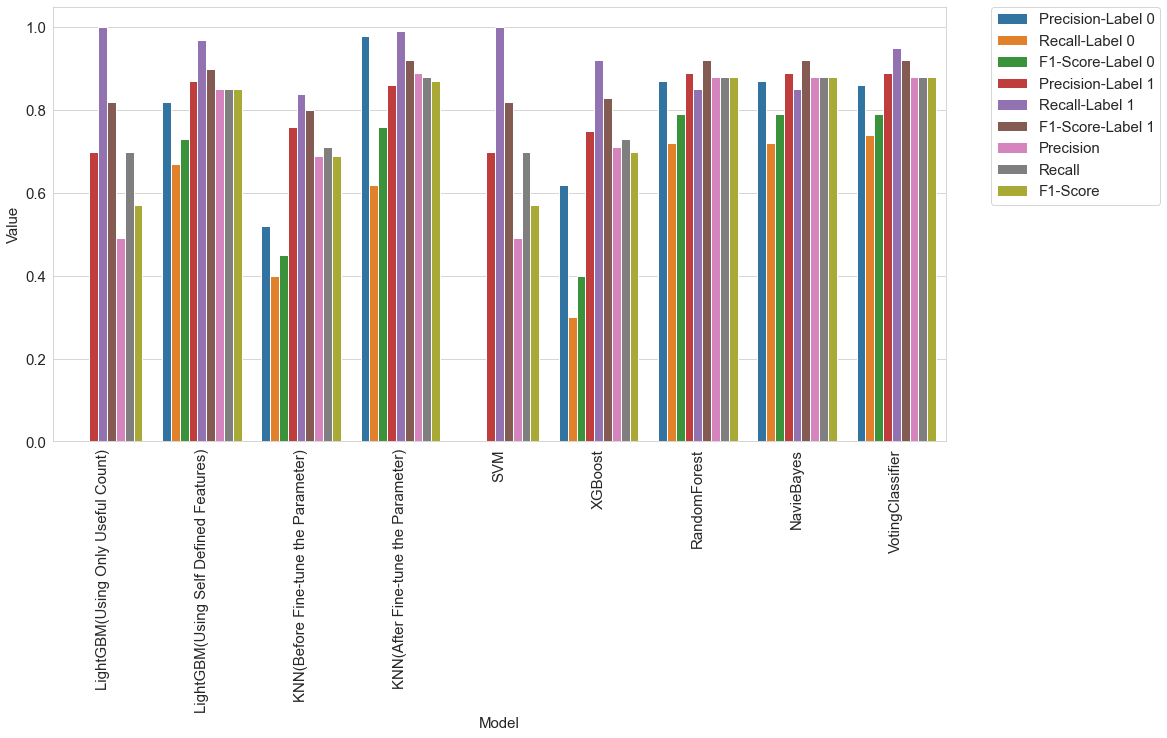

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'Model', y = 'Value', hue = 'Measurement', data = ModelPerformance)
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Value', fontsize = 15)
ax.tick_params(labelsize = 15)
plt.xticks(rotation=90)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

## Conclusion on Model Selection:
### From the barplot above, we can conclude that, the voting classifier, random forest, Naive Bayes, the KNN after fine-tuned the parameters and the voting classifier have the overall better performance.
### Considering all the measurement together, averaging the measurement, the voting classifier stand out from the rest of the models. So, the voting classifier will be our final selection here.

## Conclusion on Feature Importance:
### The system predicted sentiment helps a lot in classifying the sentimen here, following by the usefule count.

## 4.2 Sentiment Analysis Using Our Own Emotion Dictionary
## To prove the reliability of our self generated emotion dictionary, we remove the predicted sentiment feature, and use our self defined emotion dictionary based features - number of positive & negative words, instead, to see how it works to our classification task.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import re
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
import joblib

In [35]:
train=pd.read_csv('train_processed.csv',header=0,index_col=0)
test=pd.read_csv('test_processed.csv',header=0,index_col=0)

In [36]:
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'date', 'rating',
       'usefulCount', 'review_clean', 'Predict_Sentiment', 'sentiment',
       'count_sent', 'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len', 'num_Positive_Words',
       'num_Negative_Words'],
      dtype='object')

## The list of the features.

In [37]:
columns=['usefulCount','count_sent','count_word', 'count_unique_word', 'count_letters', 'count_punctuations','count_words_upper', 'count_words_title','count_stopwords', 'mean_word_len','num_Positive_Words','num_Negative_Words']

In [38]:
X_train=train[columns]
X_test=test[columns]

y_train=train['sentiment']
y_test=test['sentiment']

In [39]:
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
import joblib

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
def PrintClassification(test,pred):
    print(classification_report(test,pred))
    cm=confusion_matrix(test,pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,cmap="coolwarm",annot=True,fmt='g')

In [43]:
from sklearn.linear_model import LogisticRegression

## Firstly, we tried the logistic regression model.

In [44]:
lr = LogisticRegression(random_state = 69)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

              precision    recall  f1-score   support

           0       0.65      0.29      0.40     16207
           1       0.75      0.93      0.83     37557

    accuracy                           0.74     53764
   macro avg       0.70      0.61      0.62     53764
weighted avg       0.72      0.74      0.70     53764



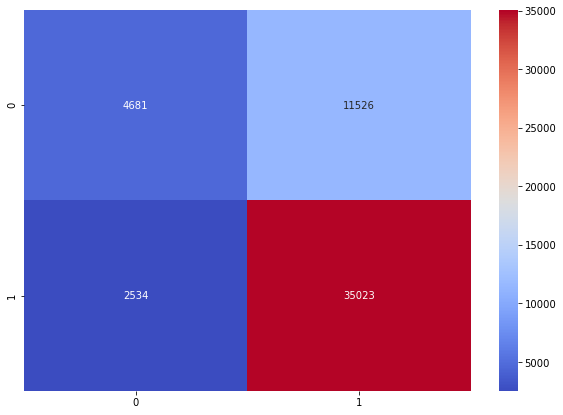

In [45]:
PrintClassification(y_test,y_pred)

## The performance is somehow good, but not outstanding while all the measurements are around 70%.

## Then, we try the KNN with the default parameters other than the K value itself.

              precision    recall  f1-score   support

           0       0.62      0.03      0.06     16207
           1       0.70      0.99      0.82     37557

    accuracy                           0.70     53764
   macro avg       0.66      0.51      0.44     53764
weighted avg       0.68      0.70      0.59     53764



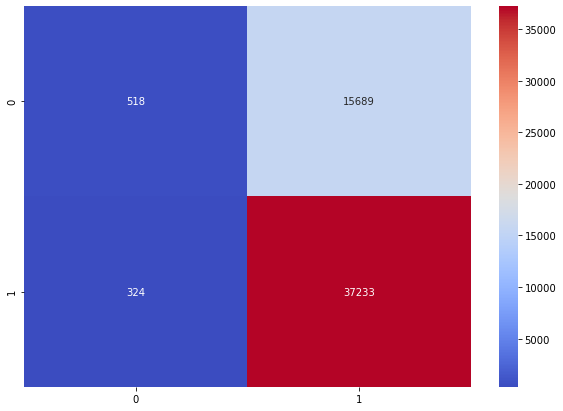

In [46]:
knn_ori=KNeighborsClassifier(n_neighbors=300)
knn_ori.fit(X_train,y_train)
y_pred_knn_ori=knn_ori.predict(X_test)
PrintClassification(y_test,y_pred_knn_ori)

## The performance is still not acceptable.

In [47]:
X_train_simplified=X_train[['count_sent','count_word', 'count_unique_word','mean_word_len','num_Positive_Words','num_Negative_Words']]
X_test_simplified=X_test[['count_sent','count_word', 'count_unique_word','mean_word_len','num_Positive_Words','num_Negative_Words']]

## Then, we try using some of simplified features for classification.

              precision    recall  f1-score   support

           0       0.71      0.13      0.22     16207
           1       0.72      0.98      0.83     37557

    accuracy                           0.72     53764
   macro avg       0.72      0.55      0.53     53764
weighted avg       0.72      0.72      0.65     53764



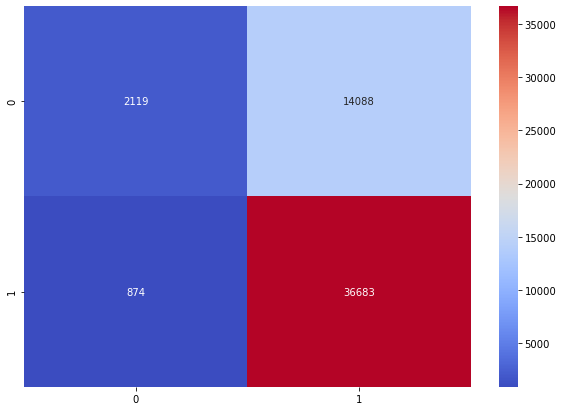

In [48]:
knn_simplified=KNeighborsClassifier(n_neighbors=300)
knn_simplified.fit(X_train_simplified,y_train)
y_pred_knn_simplified=knn_simplified.predict(X_test_simplified)
PrintClassification(y_test,y_pred_knn_simplified)

## We can find the perforamnce is improved some how, but still not that good.

## So, here, we will still use the same parameters as that fine-tuned in previous sentiment classification, and use the same features as previously, only replacing the predicted sentiment by our number of positive and negative words.

In [49]:
knn=KNeighborsClassifier(n_neighbors=300,algorithm='auto', leaf_size= 1, weights= 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=300, weights='distance')

In [50]:
y_pred=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     16207
           1       0.86      1.00      0.92     37557

    accuracy                           0.88     53764
   macro avg       0.92      0.81      0.84     53764
weighted avg       0.89      0.88      0.87     53764



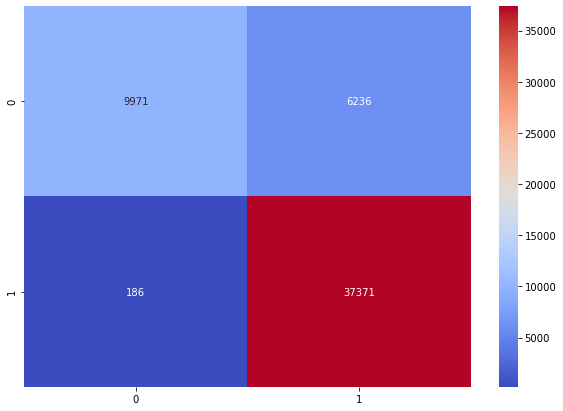

In [51]:
PrintClassification(y_test,y_pred)

## We have got a very good performance as previously.

In [52]:
joblib.dump(knn,'knn-UsingEmothionWordsCount.pkl')

['knn-UsingEmothionWordsCount.pkl']

## Then, we tried using the same Light GBM model for classification task.

In [53]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

In [54]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(X_train, y_train, 
        eval_set= [(X_train, y_train), (X_test, y_test)], 
        verbose=100, early_stopping_rounds=100  #30
    )

Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.49614	valid_1's binary_logloss: 0.526882
[200]	training's binary_logloss: 0.484212	valid_1's binary_logloss: 0.522307
[300]	training's binary_logloss: 0.47445	valid_1's binary_logloss: 0.518779
[400]	training's binary_logloss: 0.465236	valid_1's binary_logloss: 0.515663
[500]	training's binary_logloss: 0.456492	valid_1's binary_logloss: 0.512485
[600]	training's binary_logloss: 0.448724	valid_1's binary_logloss: 0.509764
[700]	training's binary_logloss: 0.441453	valid_1's binary_logloss: 0.50717
[800]	training's binary_logloss: 0.434587	valid_1's binary_logloss: 0.504776
[900]	training's binary_logloss: 0.427783	valid_1's binary_logloss: 0.502555
[1000]	training's binary_logloss: 0.420655	valid_1's binary_logloss: 0.499966
[1100]	training's binary_logloss: 0.414665	valid_1's binary_logloss: 0.497768
[1200]	training's binary_logloss: 0.408186	valid_1's binary_logloss: 0.495423
[1300]	trainin

LGBMClassifier(max_depth=7, min_child_weight=2, min_split_gain=0.01,
               n_estimators=10000, num_leaves=30, reg_alpha=0.1, reg_lambda=0.1,
               silent=-1, subsample=0.9, verbose=-1)

In [55]:
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.60      0.69     16207
           1       0.85      0.94      0.89     37557

    accuracy                           0.84     53764
   macro avg       0.83      0.77      0.79     53764
weighted avg       0.84      0.84      0.83     53764



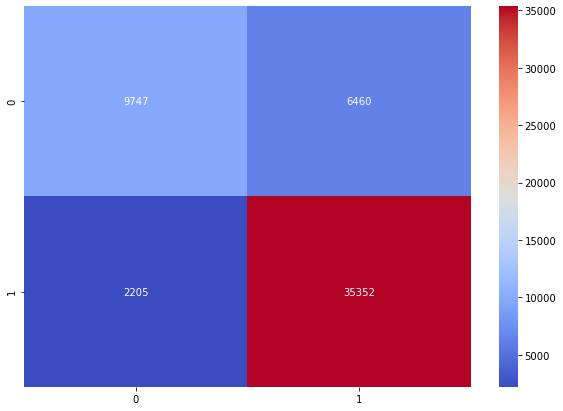

In [56]:
PrintClassification(y_test,y_pred)

## The performance is still good here.

In [57]:
joblib.dump(clf,'LightGBM-UsingEmothionWordsCount.pkl')

['LightGBM-UsingEmothionWordsCount.pkl']

In [58]:
def LightGBMFeatureImportance(clf):
    fold_importance_df = pd.DataFrame()
    feature_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = columns
    fold_importance_df["importance"] = clf.feature_importances_
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

    best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

    plt.figure(figsize=(14,10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

## Checking the feature importance, the useful count and the mean word length has the more dominated influence here than other features.

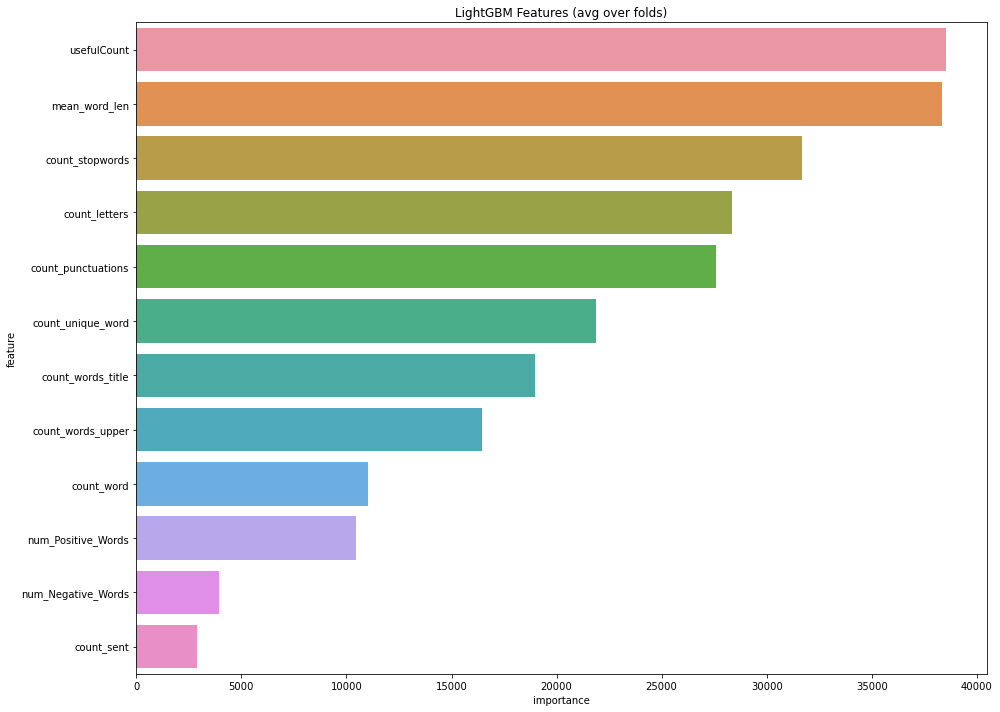

In [59]:
LightGBMFeatureImportance(clf)

## Then, we tried the XGBoost.

In [60]:
from xgboost import XGBClassifier
import xgboost as xgb

In [61]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)

[22:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.67      0.33      0.44     16207
           1       0.76      0.93      0.84     37557

    accuracy                           0.75     53764
   macro avg       0.72      0.63      0.64     53764
weighted avg       0.73      0.75      0.72     53764



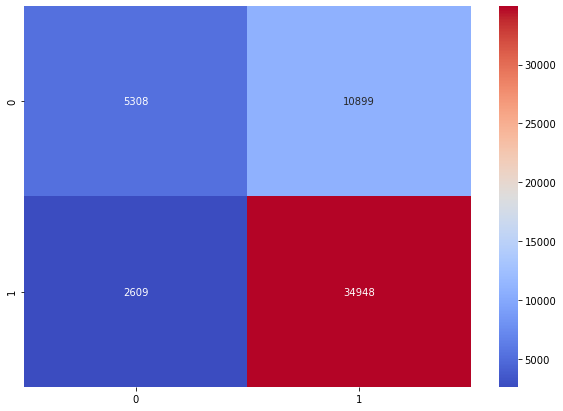

In [62]:
PrintClassification(y_test,y_pred)

## The XGBoost performed similar as previously without any surprise.

In [63]:
joblib.dump(xgbc,'XGBoost-UsingEmothionWordsCount.pkl')

['XGBoost-UsingEmothionWordsCount.pkl']

## We then applied the SVM model to our data.

In [34]:
from sklearn.svm import SVC

In [35]:
svc=SVC(probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.79      0.07      0.12     16207
           1       0.71      0.99      0.83     37557

    accuracy                           0.71     53764
   macro avg       0.75      0.53      0.48     53764
weighted avg       0.73      0.71      0.62     53764



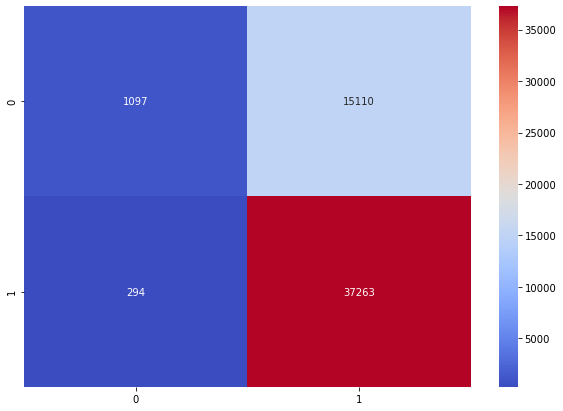

In [36]:
y_pred=svc.predict(X_test)
PrintClassification(y_test,y_pred)

## Now, we have a few things to note. The performance of the SVM here works better than the previous one, while it is better classifying the label 0, even it is still not good enough. This may be due to that our new defined features influence it somehow.

In [37]:
joblib.dump(svc,'SVM-UsingEmothionWordsCount.pkl')

['SVM-UsingEmothionWordsCount.pkl']

## Then, we tried the random forest model.

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     16207
           1       0.89      0.95      0.92     37557

    accuracy                           0.89     53764
   macro avg       0.88      0.84      0.86     53764
weighted avg       0.88      0.89      0.88     53764



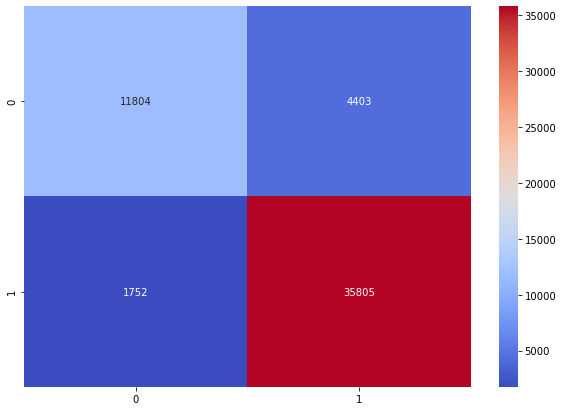

In [66]:
y_pred=rf.predict(X_test)
PrintClassification(y_test,y_pred)

## Nicely, the random forest achieved a high performance as before.

In [67]:
joblib.dump(rf,'RandomForest-UsingEmotionWordsCount.pkl')

['RandomForest-UsingEmotionWordsCount.pkl']

In [68]:
import shap

## Checking the feature importance, our self defined emotional features - number of negative words has the dominated influence here.

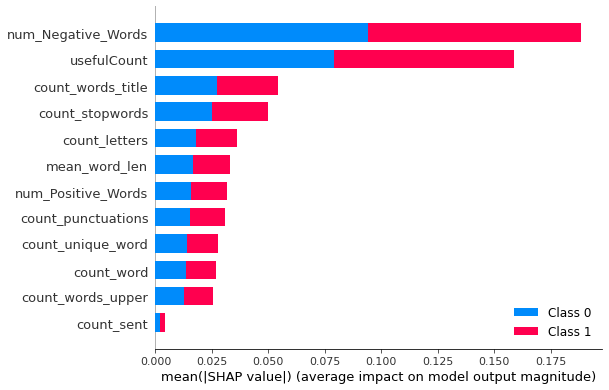

In [69]:
randomforest_explainer = shap.TreeExplainer(rf)
shap_values = randomforest_explainer.shap_values(shap.sample(X_test,100))
feature_names=list(X_test.columns)
shap.summary_plot(shap_values, features=X_test, feature_names=feature_names,plot_type="bar")

## We then try the Naive Bayes model

In [74]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     16207
           1       0.88      0.97      0.92     37557

    accuracy                           0.89     53764
   macro avg       0.89      0.84      0.86     53764
weighted avg       0.89      0.89      0.88     53764



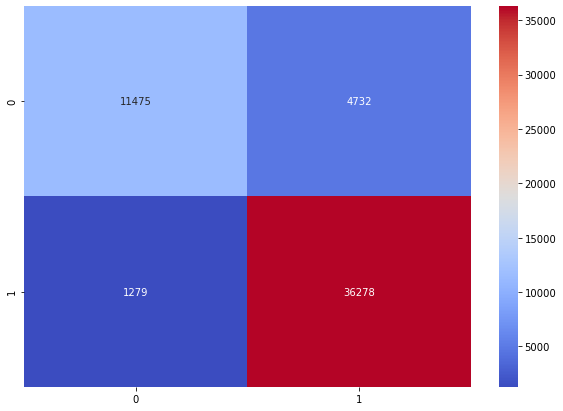

In [76]:
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_val_pred=nb.predict(X_test)
PrintClassification(y_test,y_pred)

## Nicely, it also works well.

In [77]:
joblib.dump(nb,'NaiveBayes-UsingEmotionWordsCount.pkl')

['NaiveBayes-UsingEmotionWordsCount.pkl']

In [83]:
from sklearn.inspection import permutation_importance

In [85]:
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

In [87]:
feature_names=list(X_test.columns)

## Checking the feature importance, our self-defined emotional feature - the number of the negative words also have the most dominated impact here, following by the useful count.

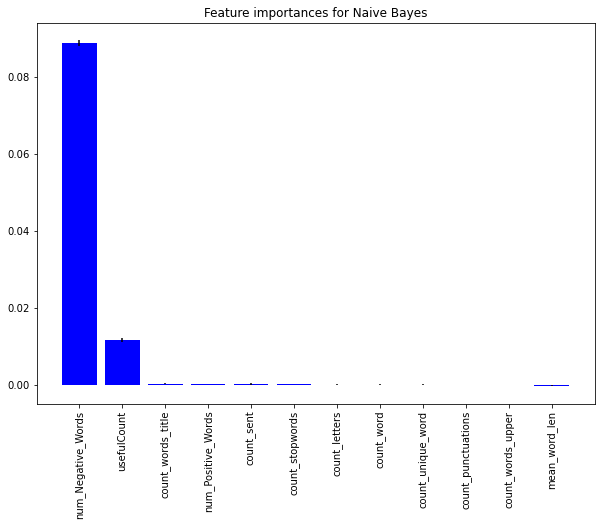

In [93]:
plt.figure(figsize=(10, 7))
plt.title("Feature importances for Naive Bayes")
plt.bar(range(12), importances[indices], color="b", yerr=std[indices][0:12], align="center")
plt.xticks(range(12), [feature_names[indices[i]] for i in range(12)],rotation=90)
plt.xlim([-1, 12])
plt.show()

In [78]:
from sklearn.ensemble import VotingClassifier
import sklearn

## Lastly, we built a voting classifier, combining all the models that have the precision higher than 80%(considering 80% as a threshold to distinguish the good or bad models) for hard voting.

In [79]:
e=[('KNN',knn),('RandomForest',rf),('LightGBM',clf),('NaiveBayes',nb)]

In [80]:
vc= VotingClassifier(estimators=e,voting='hard')
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(leaf_size=1, n_neighbors=300,
                                                   weights='distance')),
                             ('RandomForest', RandomForestClassifier()),
                             ('LightGBM',
                              LGBMClassifier(max_depth=7, min_child_weight=2,
                                             min_split_gain=0.01,
                                             n_estimators=10000, num_leaves=30,
                                             reg_alpha=0.1, reg_lambda=0.1,
                                             silent=-1, subsample=0.9,
                                             verbose=-1)),
                             ('NaiveBayes', GaussianNB())])

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     16207
           1       0.89      0.95      0.92     37557

    accuracy                           0.88     53764
   macro avg       0.88      0.84      0.86     53764
weighted avg       0.88      0.88      0.88     53764



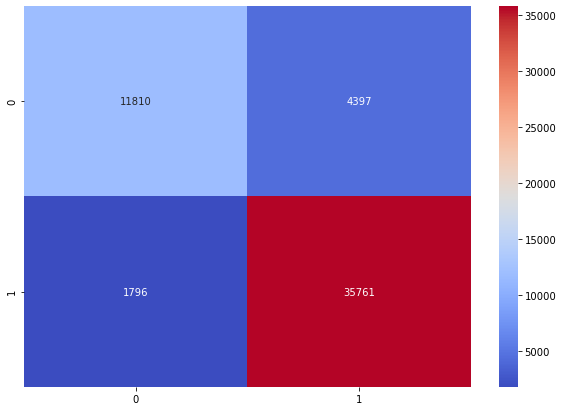

In [81]:
y_pred=vc.predict(X_test)
PrintClassification(y_test,y_pred)

## The performance is good as expected.

In [82]:
joblib.dump(vc,'VotingClassifier-UsingEmotionWordsCount.pkl')

['VotingClassifier-UsingEmotionWordsCount.pkl']

## After that, we have done a performance comparison & evaluation between different models.

In [3]:
ModelPerformance=pd.read_csv('ModelPerformance_v2.csv')
ModelPerformance

Unnamed: 0     FeatureSelected                              Model  \
0             0  SelfDefiendFeature  LightGBM(Using Only Useful Count)   
1             1  SelfDefiendFeature  LightGBM(Using Only Useful Count)   
2             2  SelfDefiendFeature  LightGBM(Using Only Useful Count)   
3             3  SelfDefiendFeature  LightGBM(Using Only Useful Count)   
4             4  SelfDefiendFeature  LightGBM(Using Only Useful Count)   
..          ...                 ...                                ...   
166         166    UsingEmotionDict                   VotingClassifier   
167         167    UsingEmotionDict                   VotingClassifier   
168         168    UsingEmotionDict                   VotingClassifier   
169         169    UsingEmotionDict                   VotingClassifier   
170         170    UsingEmotionDict                   VotingClassifier   

           Measurement  Value  
0    Precision-Label 0   0.00  
1       Recall-Label 0   0.00  
2     F1-Score-Label 0   0.00  
3    Precision-Label 1   0.70  
4       Recall-Label 1   1.00  
..                 ...    ...  
166     Recall-Label 1   0.95  
167   F1-Score-Label 1   0.92  
168          Precision   0.88  
169             Recall   0.88  
170           F1-Score   0.88  

[171 rows x 5 columns]

In [4]:
ModelPerformance=ModelPerformance[ModelPerformance['FeatureSelected']=='UsingEmotionDict']
ModelPerformance

Unnamed: 0   FeatureSelected               Model        Measurement  \
81           81  UsingEmotionDict  LogisticRegression  Precision-Label 0   
82           82  UsingEmotionDict  LogisticRegression     Recall-Label 0   
83           83  UsingEmotionDict  LogisticRegression   F1-Score-Label 0   
84           84  UsingEmotionDict  LogisticRegression  Precision-Label 1   
85           85  UsingEmotionDict  LogisticRegression     Recall-Label 1   
..          ...               ...                 ...                ...   
166         166  UsingEmotionDict    VotingClassifier     Recall-Label 1   
167         167  UsingEmotionDict    VotingClassifier   F1-Score-Label 1   
168         168  UsingEmotionDict    VotingClassifier          Precision   
169         169  UsingEmotionDict    VotingClassifier             Recall   
170         170  UsingEmotionDict    VotingClassifier           F1-Score   

     Value  
81    0.65  
82    0.29  
83    0.40  
84    0.75  
85    0.93  
..     ...  
166   0.95  
167   0.92  
168   0.88  
169   0.88  
170   0.88  

[90 rows x 5 columns]

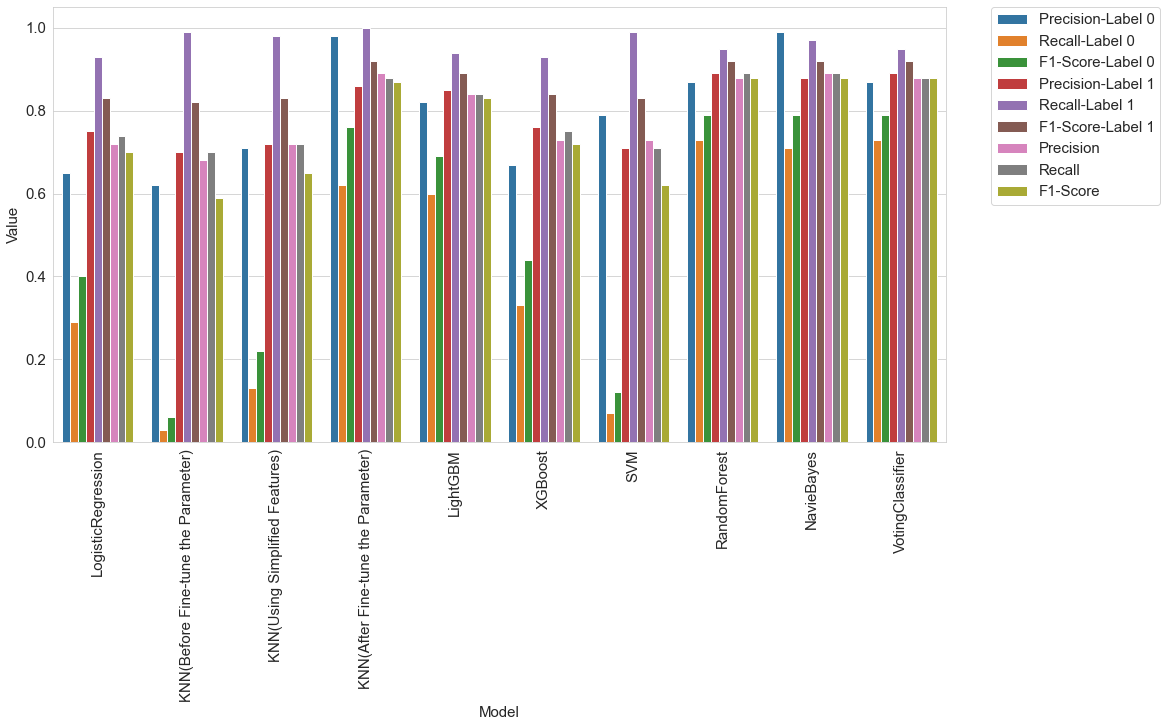

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'Model', y = 'Value', hue = 'Measurement', data = ModelPerformance)
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Value', fontsize = 15)
ax.tick_params(labelsize = 15)
plt.xticks(rotation=90)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

## Conclusion on Model Selection:
### From the barplot above, we can conclude that, the voting classifier, random forest, Naive Bayes, the KNN after fine-tuned the parameters and the voting classifier have the overall better performance.
### Considering all the measurement together, averaging the measurement, the voting classifier & Naive Bayes stand out from the rest of the models. So, the voting classifier will be our final selection here.

## Conclusion on Feature Importance:
### Our self defined sentiment words count helps a lot in classifying the sentimen here, which almost let the same model here achieve the same performance as that when we are using the system generated sentiment.

 
# 5. Overall Conclution & Limitation
## Conclution:
### 1. The KNN with the best parameters, Random Forest, Naive Bayes, Light GBM & Voting Classifier are better performed in the sentiment analysis work on both features with the system generated sentiment and our sefl-defined sentiment.
### 2. Our self defined sentiment words works as good as the system generated sentiment, letting the models achieved a high performance, or even let the SVM perform better.
## Limitation:
### 1. In the recomendation part, the models still has large potential to be discovered to perform better.
### 2. In the word vector based classification, the models also have large potential to be discovered to perform better

## Reference:
### https://www.kaggle.com/chocozzz/recommendation-medicines-by-using-a-review